# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:



import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount =True)

Mounted at /content/drive


In [ ]:
path=('/content/drive/MyDrive/Project4/INNHotelsGroup.csv')
innhotels=pd.read_csv(path)

## Data Overview

- Observations
- Sanity checks

In [ ]:
innhotels.shape

(36275, 19)

- The data is made up of 36,275 rows and 19 columns

In [ ]:
innhotels.head(10)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   
5   INN00006             2               0                     0   
6   INN00007             2               0                     1   
7   INN00008             2               0                     1   
8   INN00009             3               0                     0   
9   INN00010             2               0                     0   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   
5                  2       Meal Plan 2                           0   
6                  3       Meal Plan 1                           0   
7                  3       Meal Plan 1                           0   
8                  4       Meal Plan 1                           0   
9                  5       Meal Plan 1                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   
5        Room_Type 1        346          2018              9            13   
6        Room_Type 1         34          2017             10            15   
7        Room_Type 4         83          2018             12            26   
8        Room_Type 1        121          2018              7             6   
9        Room_Type 4         44          2018             10            18   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   
5              Online               0                             0   
6              Online               0                             0   
7              Online               0                             0   
8             Offline               0                             0   
9              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   
5                                     0           115.00000   
6                                     0           107.55000   
7                                     0           105.61000   
8                                     0            96.90000   
9                                     0           133.44000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                 

In [ ]:
innhotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
innhotels.duplicated().value_counts()

False    36275
dtype: int64


- There are no duplicates in the data

In [ ]:
innhotels.isnull().values.any()

False


- There are no missing values in the data

In [ ]:
innhotels.describe(include='all').T

count unique           top   freq  \
Booking_ID                                 36275  36275      INN00001      1   
no_of_adults                         36275.00000    NaN           NaN    NaN   
no_of_children                       36275.00000    NaN           NaN    NaN   
no_of_weekend_nights                 36275.00000    NaN           NaN    NaN   
no_of_week_nights                    36275.00000    NaN           NaN    NaN   
type_of_meal_plan                          36275      4   Meal Plan 1  27835   
required_car_parking_space           36275.00000    NaN           NaN    NaN   
room_type_reserved                         36275      7   Room_Type 1  28130   
lead_time                            36275.00000    NaN           NaN    NaN   
arrival_year                         36275.00000    NaN           NaN    NaN   
arrival_month                        36275.00000    NaN           NaN    NaN   
arrival_date                         36275.00000    NaN           NaN    NaN   
market_segment_type                        36275      5        Online  23214   
repeated_guest                       36275.00000    NaN           NaN    NaN   
no_of_previous_cancellations         36275.00000    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled 36275.00000    NaN           NaN    NaN   
avg_price_per_room                   36275.00000    NaN           NaN    NaN   
no_of_special_requests               36275.00000    NaN           NaN    NaN   
booking_status                             36275      2  Not_Canceled  24390   

                                           mean      std        min  \
Booking_ID                                  NaN      NaN        NaN   
no_of_adults                            1.84496  0.51871    0.00000   
no_of_children                          0.10528  0.40265    0.00000   
no_of_weekend_nights                    0.81072  0.87064    0.00000   
no_of_week_nights                       2.20430  1.41090    0.00000   
type_of_meal_plan                           NaN      NaN        NaN   
required_car_parking_space              0.03099  0.17328    0.00000   
room_type_reserved                          NaN      NaN        NaN   
lead_time                              85.23256 85.93082    0.00000   
arrival_year                         2017.82043  0.38384 2017.00000   
arrival_month                           7.42365  3.06989    1.00000   
arrival_date                           15.59700  8.74045    1.00000   
market_segment_type                         NaN      NaN        NaN   
repeated_guest                          0.02564  0.15805    0.00000   
no_of_previous_cancellations            0.02335  0.36833    0.00000   
no_of_previous_bookings_not_canceled    0.15341  1.75417    0.00000   
avg_price_per_room                    103.42354 35.08942    0.00000   
no_of_special_requests                  0.61966  0.78624    0.00000   
booking_status                              NaN      NaN        NaN   

                                            25%        50%        75%  \
Booking_ID                                  NaN        NaN        NaN   
no_of_adults                            2.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    1.00000    2.00000   
no_of_week_nights                       1.00000    2.00000    3.00000   
type_of_meal_plan                           NaN        NaN        NaN   
required_car_parking_space              0.00000    0.00000    0.00000   
room_type_reserved                          NaN        NaN        NaN   
lead_time                              17.00000   57.00000  126.00000   
arrival_year                         2018.00000 2018.00000 2018.00000   
arrival_month                           5.00000    8.00000   10.00000   
arrival_date                            8.00000   16.00000   23.00000   
market_segment_type                         NaN        NaN        NaN   


- Booking ID has 36,275 unique features, this implies each row have unique id, we can then drop booking_id column, since it have no significance impact in determining whether a booking is cancelled or not

- There are 4 unique meal plans, with **meal plan 1** (breakfast) being the most booked, with 27,835 bookings

- There are 7 unique room types, with **Room_type 1** booked 28,130 times

- There are 5 unique **market_segment_type**, with the **Online** topping with 23,214

- There are 2 unique **booking_status**, with 24,390 bookings **Not_cancelled**

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [ ]:
inn=innhotels.copy()

In [ ]:
inn.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
inn=inn.drop(['Booking_ID'], axis=1)

In [ ]:
inn.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### To visualize the busiest months in the hotel

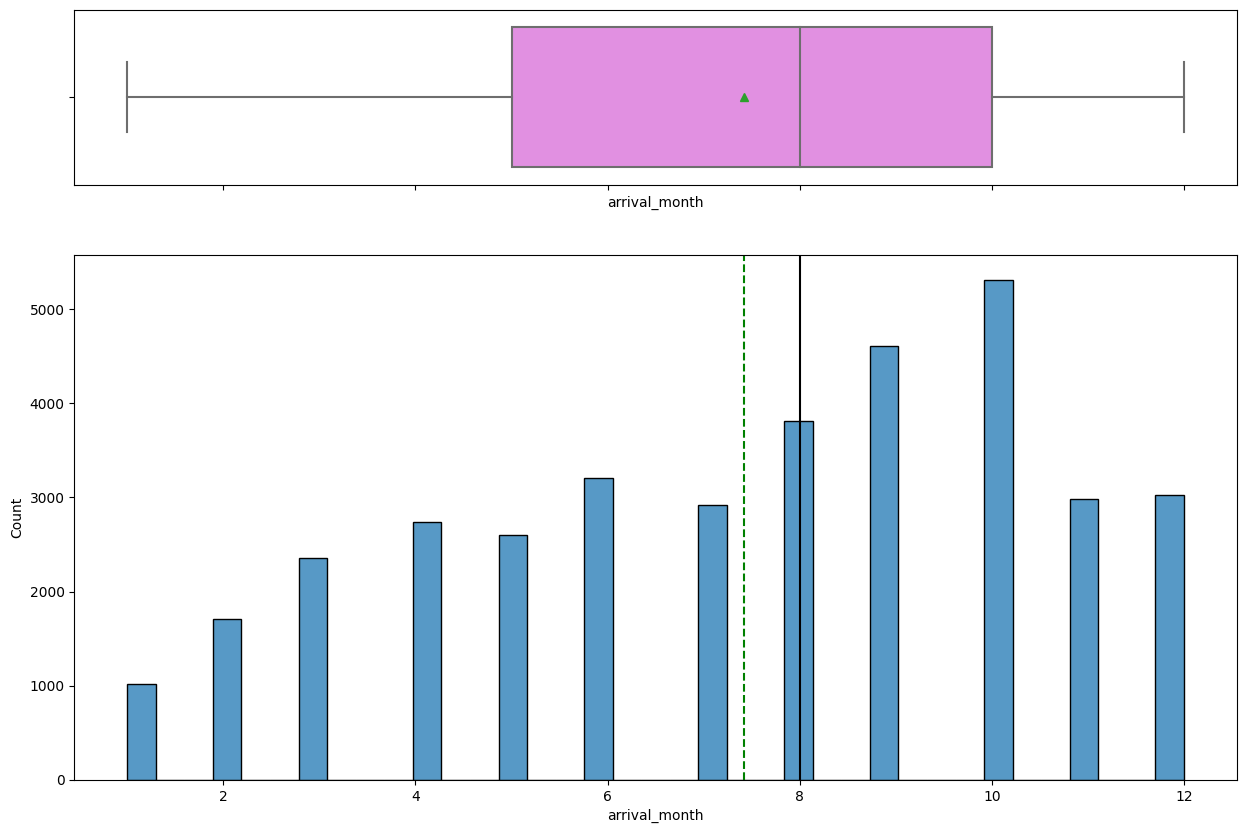

In [ ]:
histogram_boxplot(inn, 'arrival_month')

####Observations

- The most busiest month of the Hotel is October, with over 5500 approximate bookings, followed by September, with 4500 approximate bookings, next is August with 3800 approximate bookings, next is June.

### Understanding the market segment with the most guest bookings

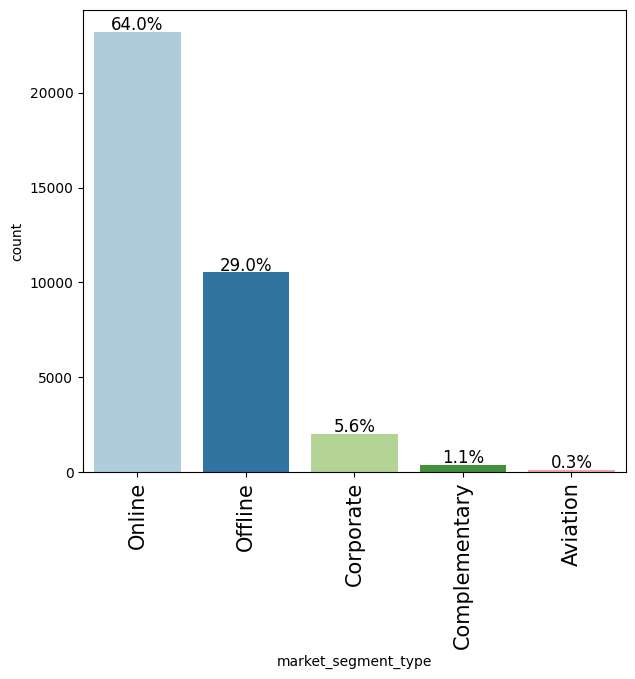

In [ ]:
labeled_barplot(inn, 'market_segment_type')

####Observations

###Understanding Hotel pricing dynamics

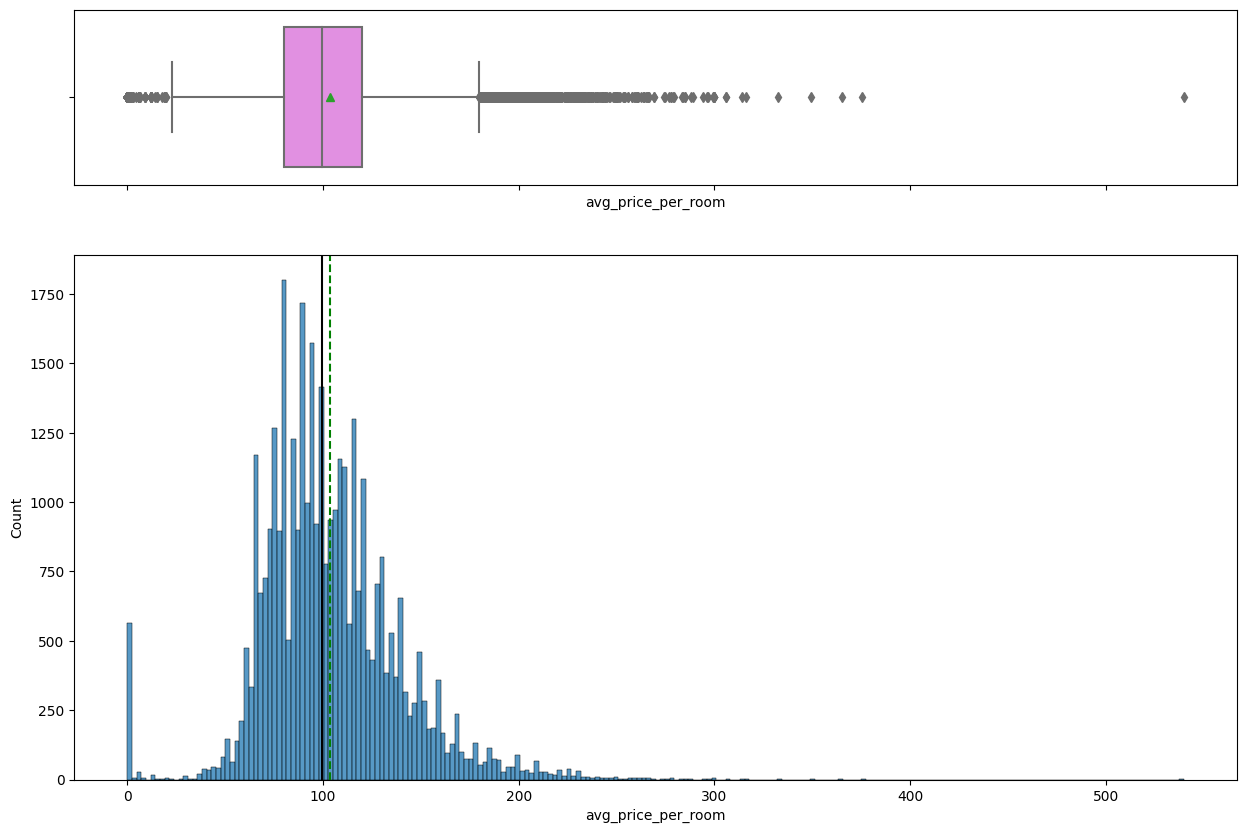

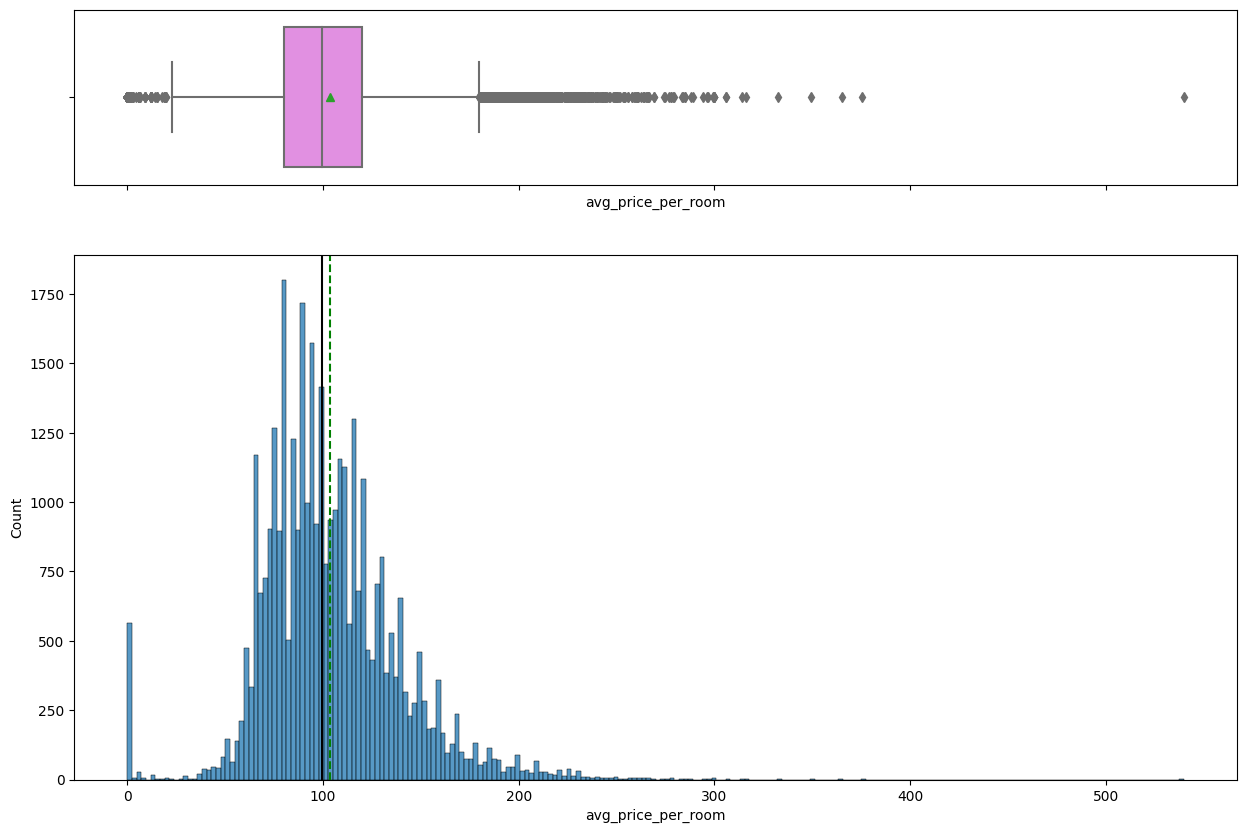

In [ ]:
histogram_boxplot(inn, 'avg_price_per_room')

####Observations

###Understanding bookings

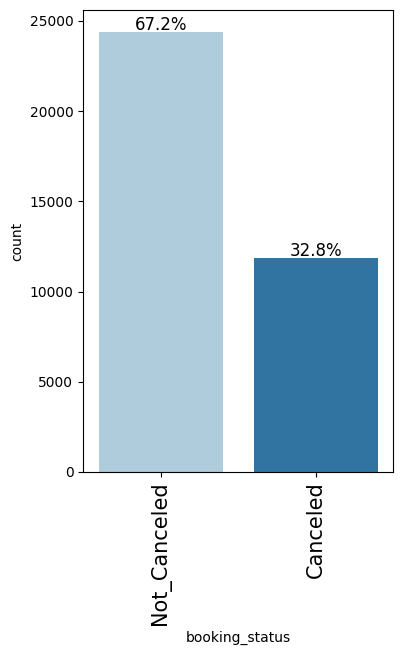

In [ ]:
labeled_barplot(inn, 'booking_status')

####Observations

In [ ]:
num_cols = inn.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(inn,x=inn[variable],kde=True)
    plt.tight_layout(pad=2)

plt.show()

NameError: ignored

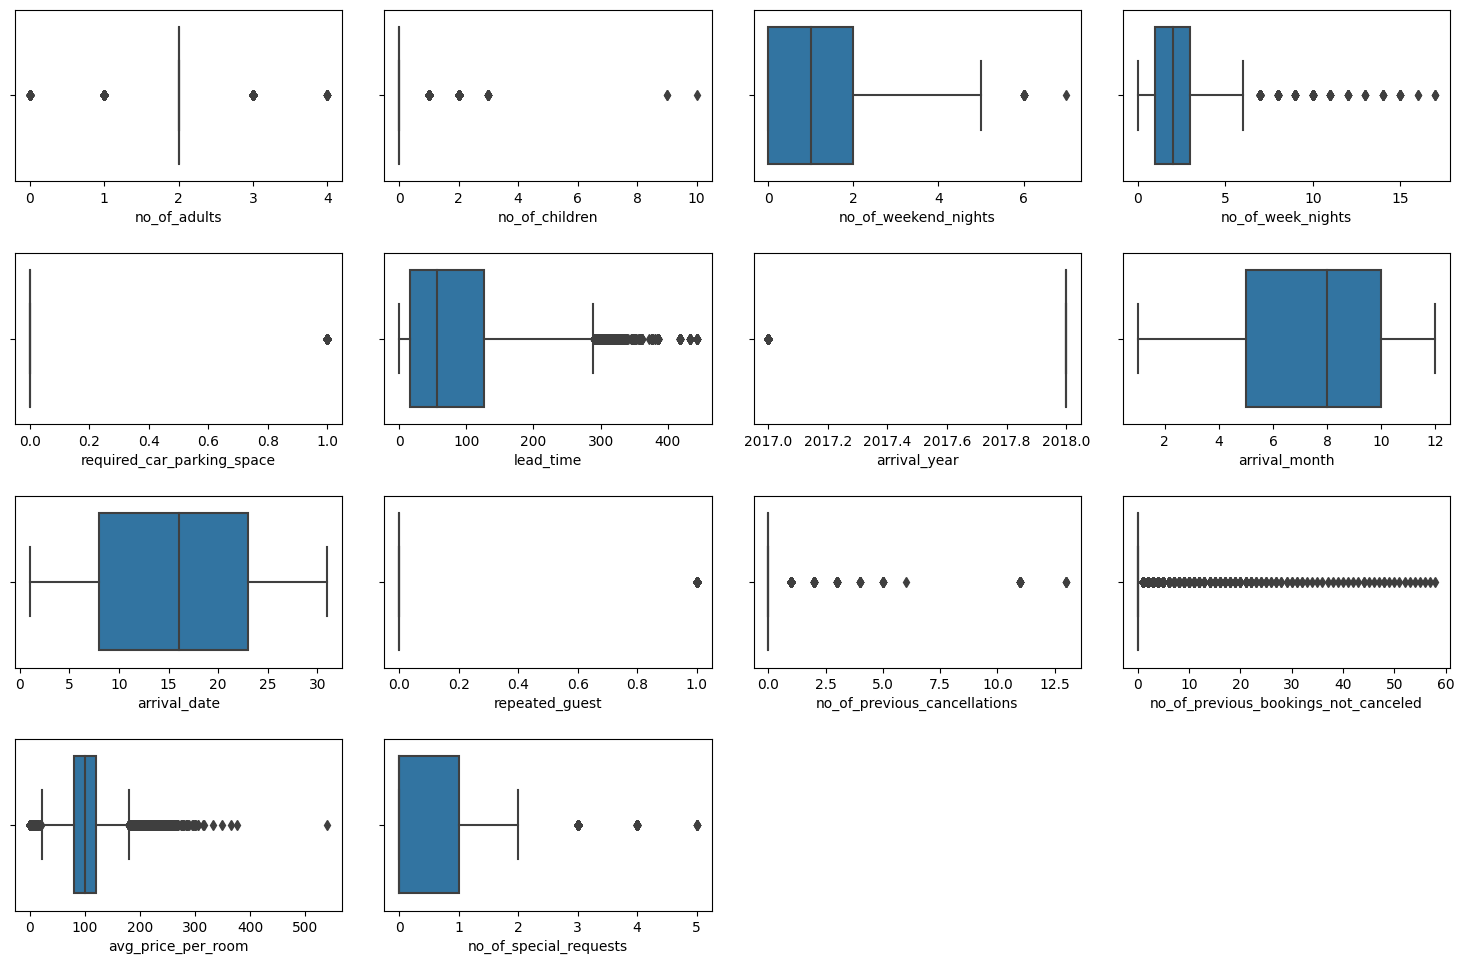

In [ ]:
num_cols = inn.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=inn, x=variable)
    plt.tight_layout(pad=2)

plt.show()

##**Bivariate** Analysis

In [ ]:


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

###Understanding repeated guest bookings

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


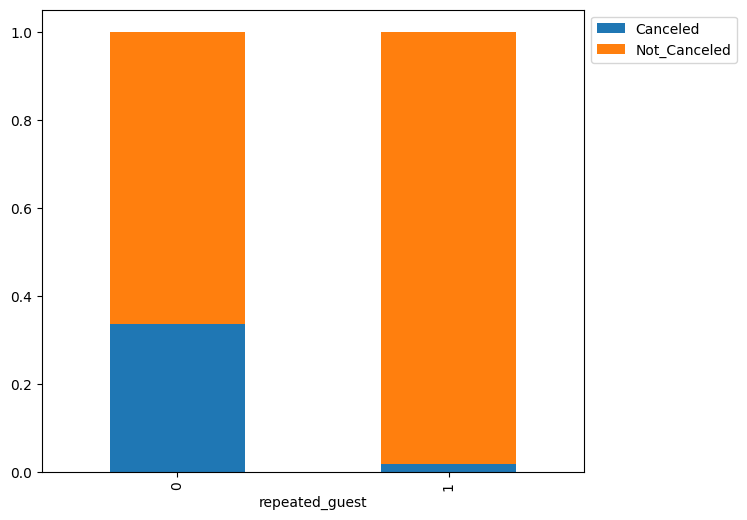

In [ ]:
stacked_barplot(inn, 'repeated_guest', 'booking_status')

####Observations
- Only 16 out of 930 repeated guests canceled their bookings
- Whereas 11869 out of 23476 of none repeated guest canceled their bookings

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


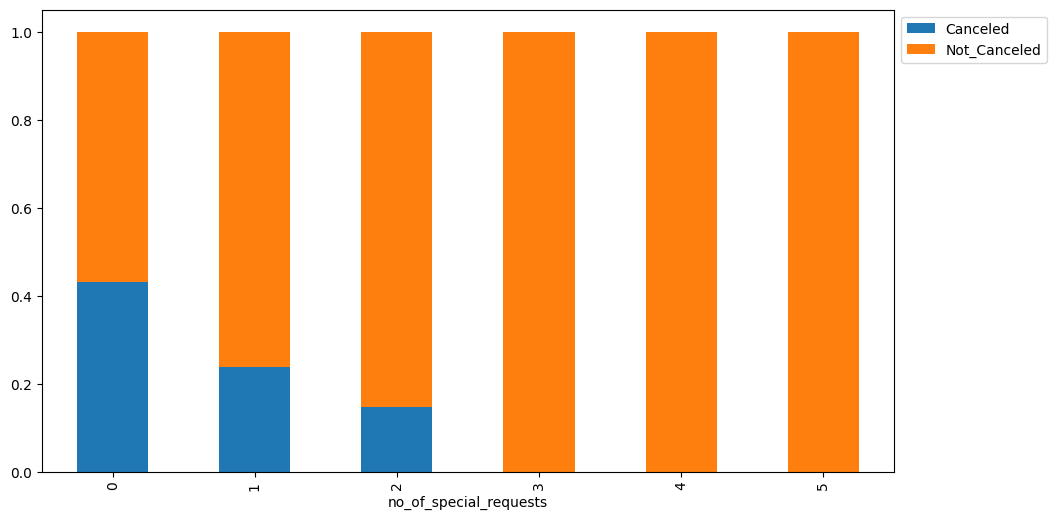

In [ ]:
stacked_barplot(inn, 'no_of_special_requests', 'booking_status')

####Observations

- Guests with 3,4 and 5 numbers of special requests did not cancel their bookings
- meanwhile 8545 out of 19777 of guests with no special request canceled their bookings
- While 2703 out of 11373 of guests with one special request canceled their bookings
- As well as 637 out of 4364 of guest with 2 special requests canceled their bookings
- This implies the more special requests guests make the more likelihood it is that bookings will not be canceled

<Figure size 2500x1500 with 0 Axes>

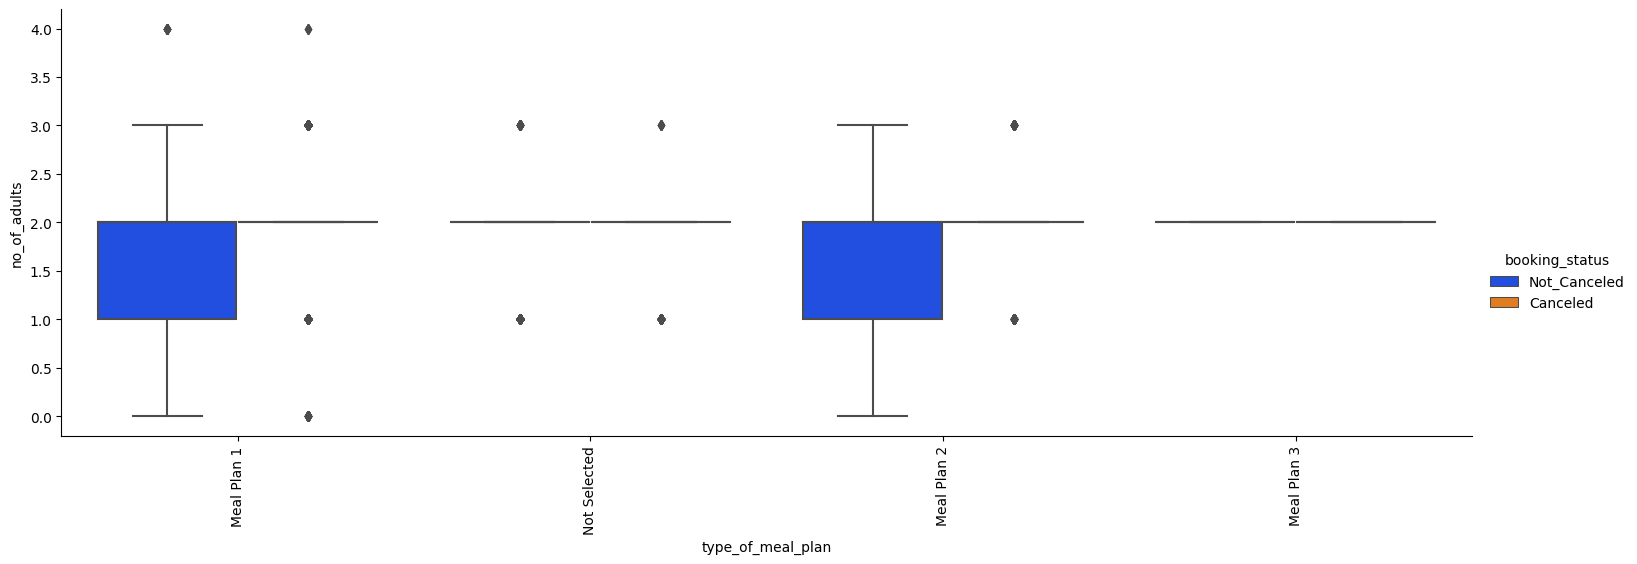

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='type_of_meal_plan', y='no_of_adults', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

####Observations

-We can notice that most(mode) number of adults making bookings is 2 across various meal plans, whether not canceled or canceled



<Figure size 2500x1500 with 0 Axes>

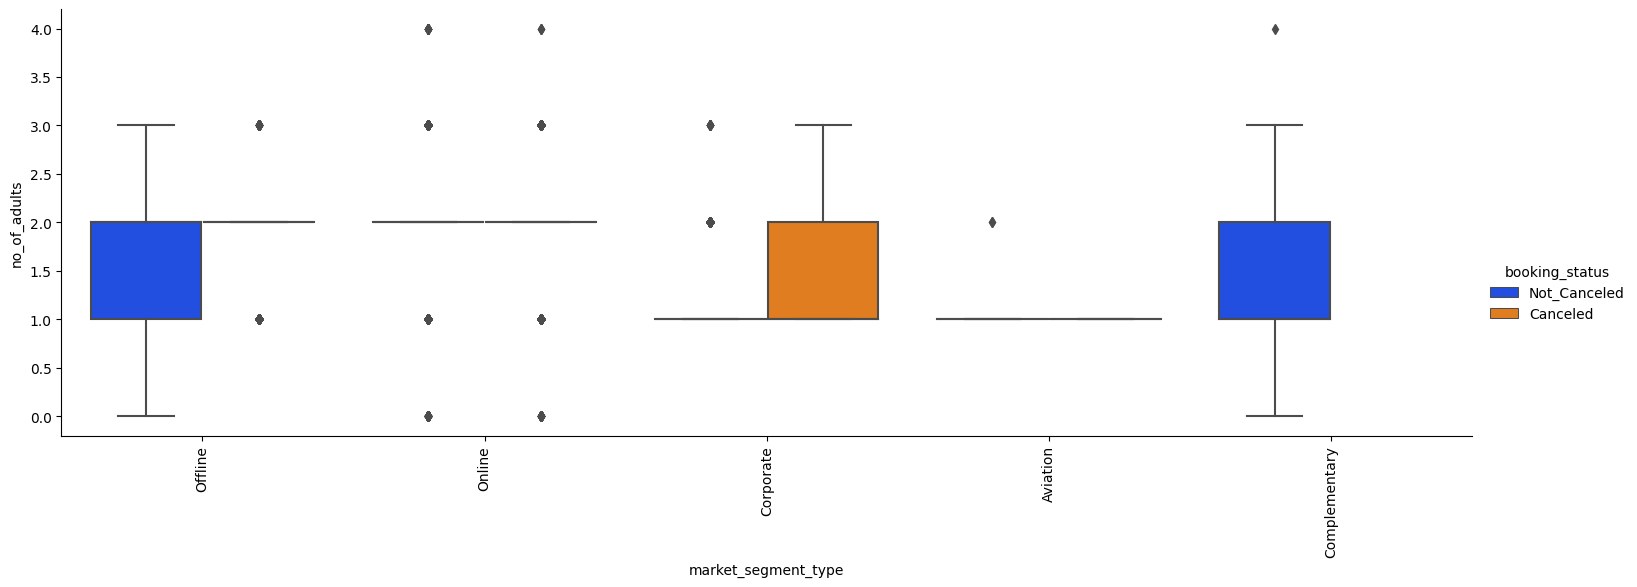

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='market_segment_type', y='no_of_adults', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

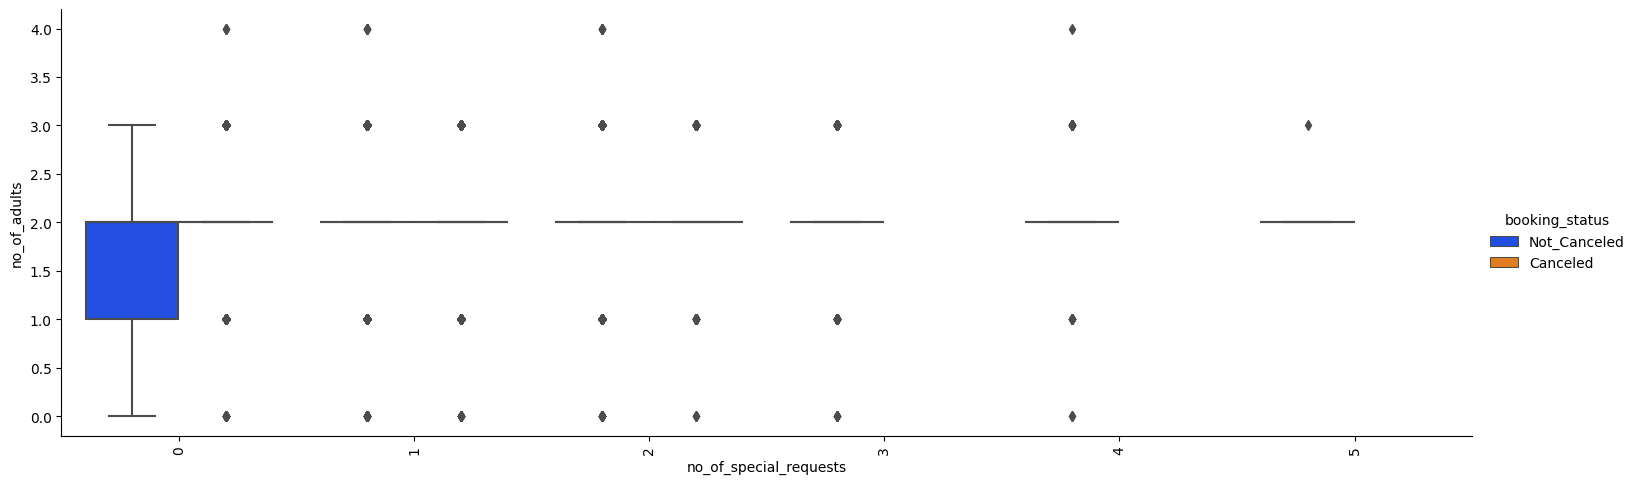

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='no_of_special_requests', y='no_of_adults', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

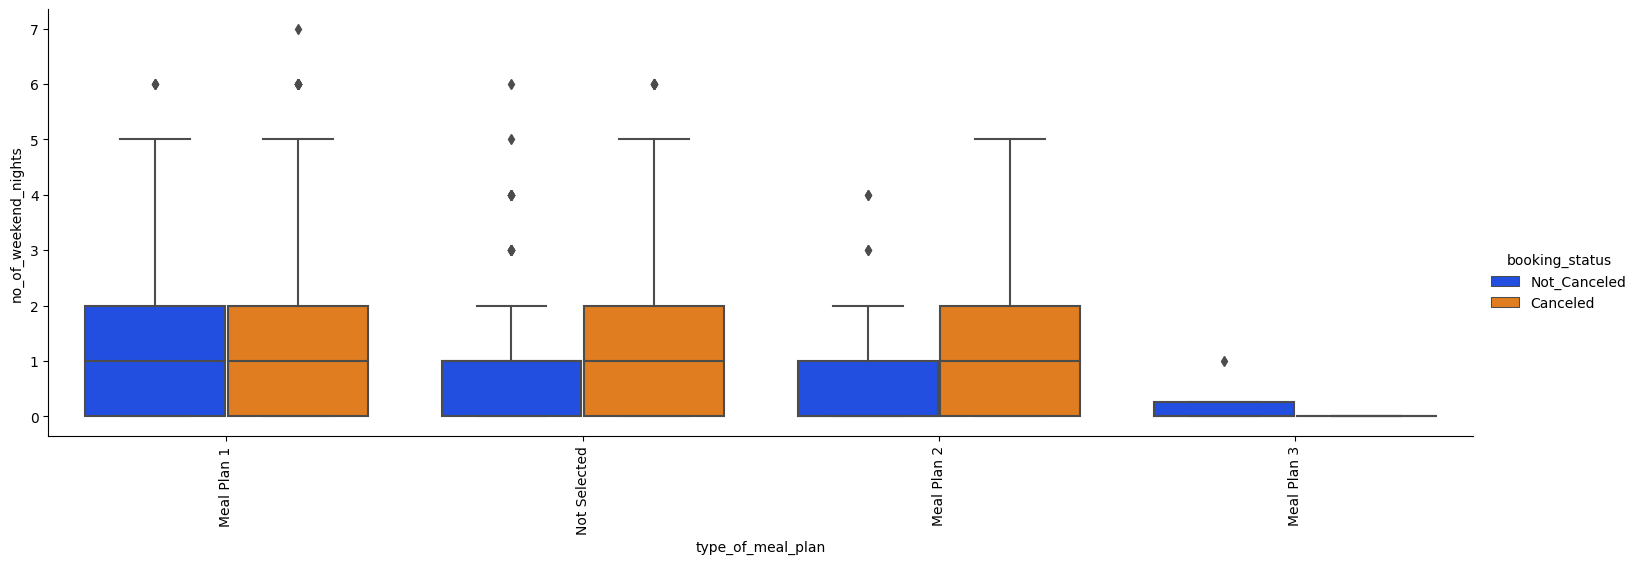

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='type_of_meal_plan', y='no_of_weekend_nights', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

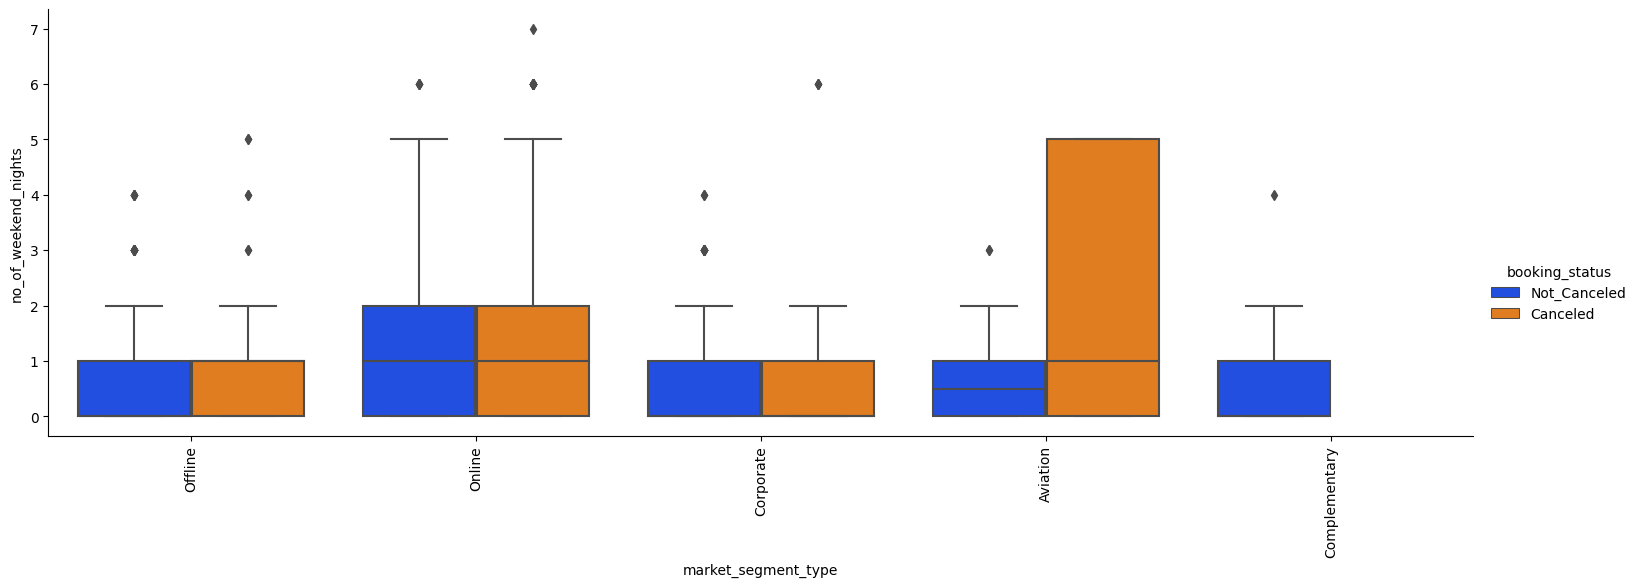

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='market_segment_type', y='no_of_weekend_nights', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

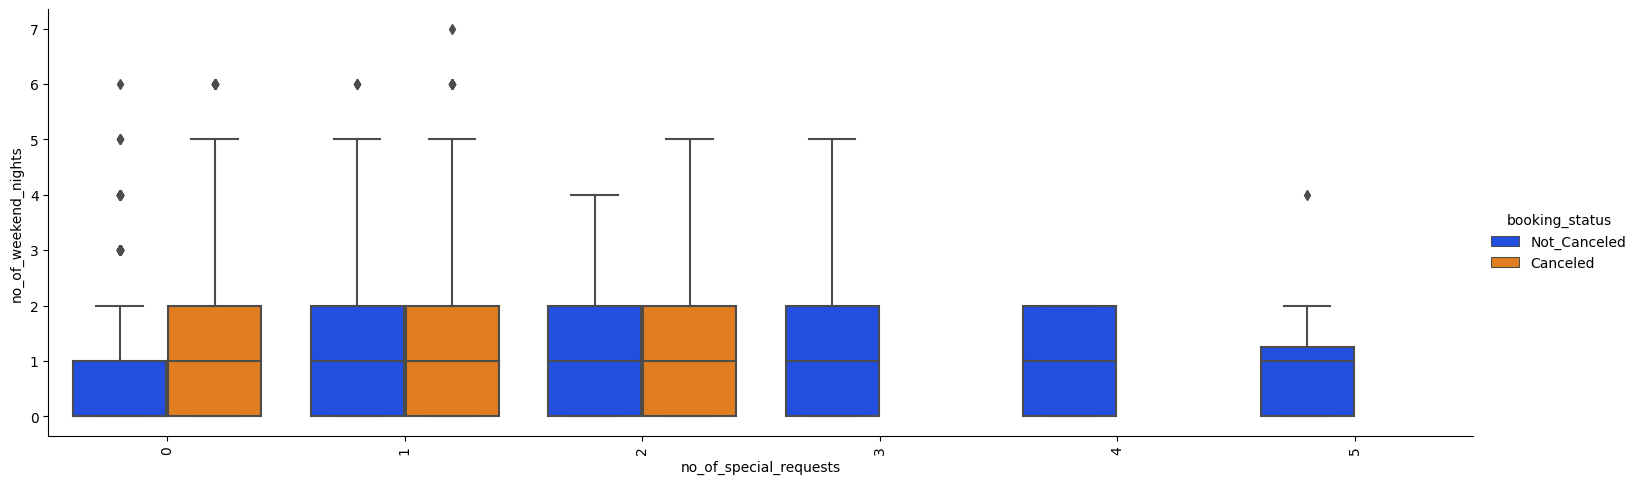

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='no_of_special_requests', y='no_of_weekend_nights', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

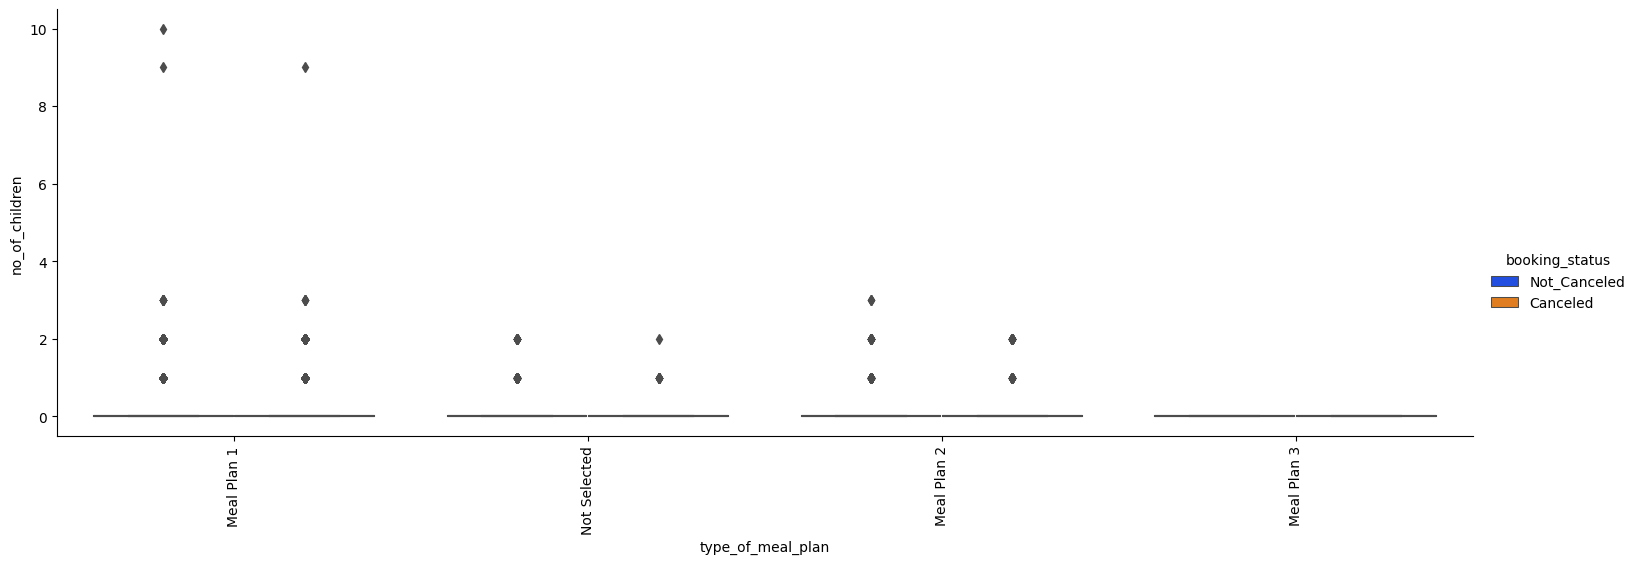

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='type_of_meal_plan', y='no_of_children', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

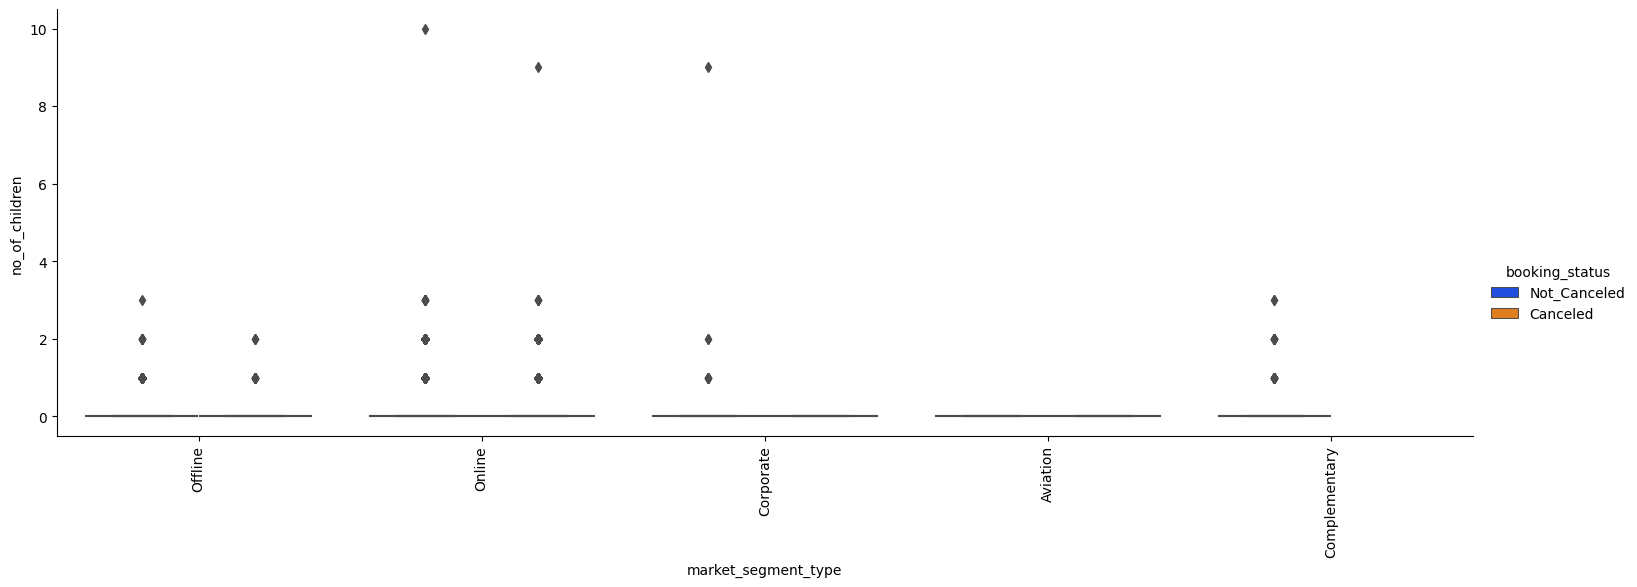

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='market_segment_type', y='no_of_children', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

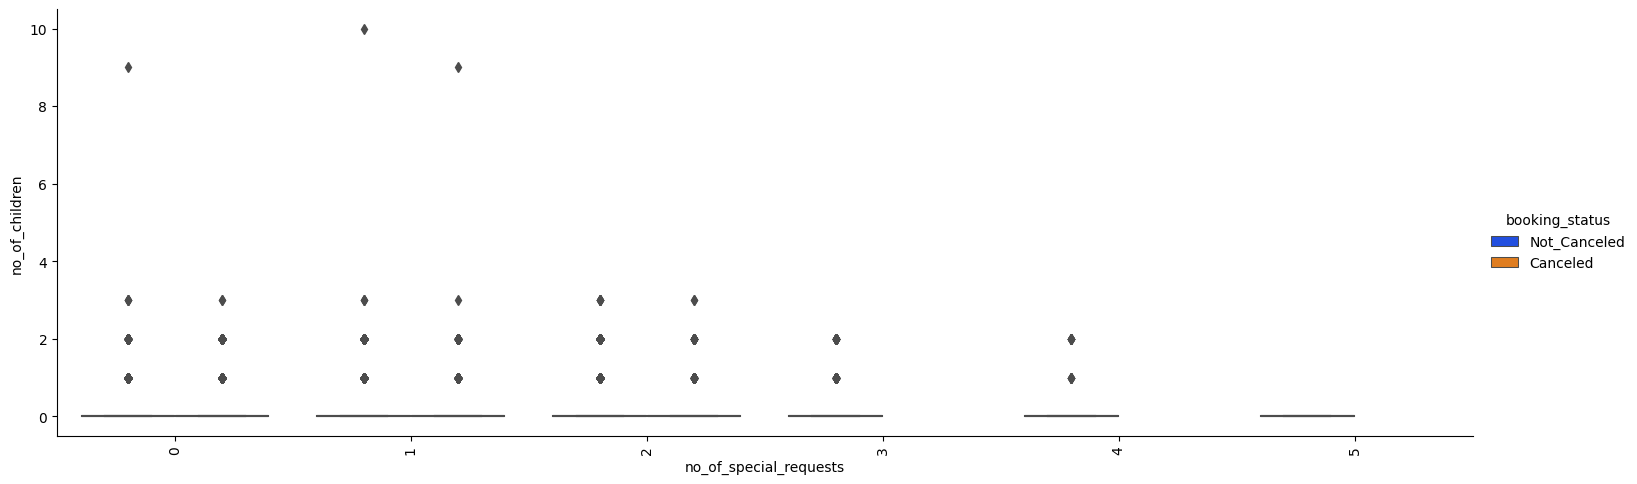

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='no_of_special_requests', y='no_of_children', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

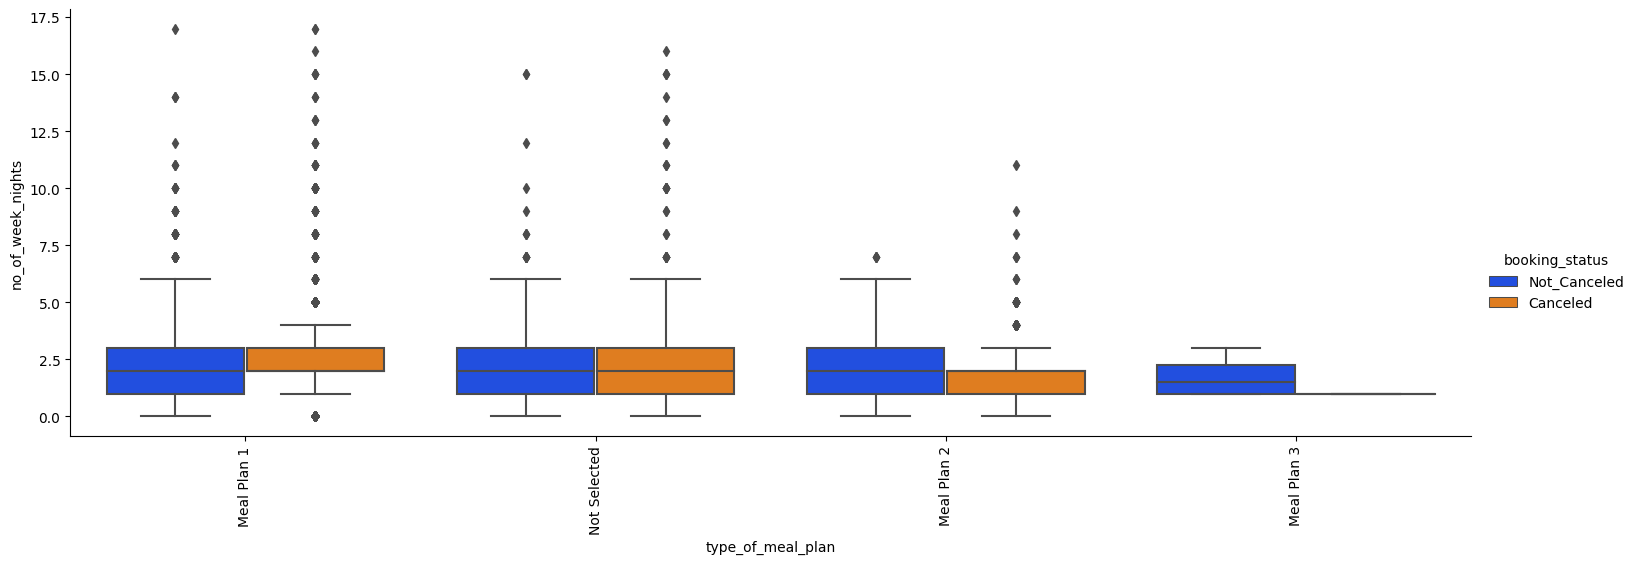

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='type_of_meal_plan', y='no_of_week_nights', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

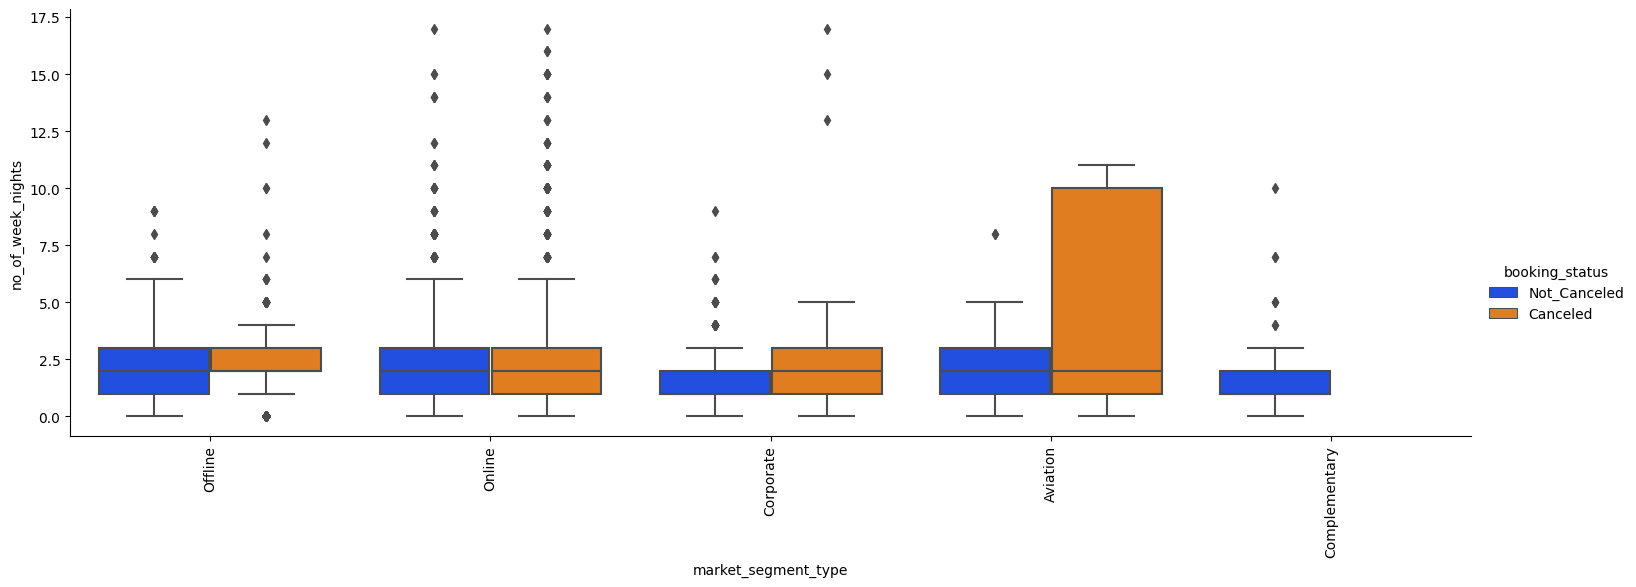

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='market_segment_type', y='no_of_week_nights', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

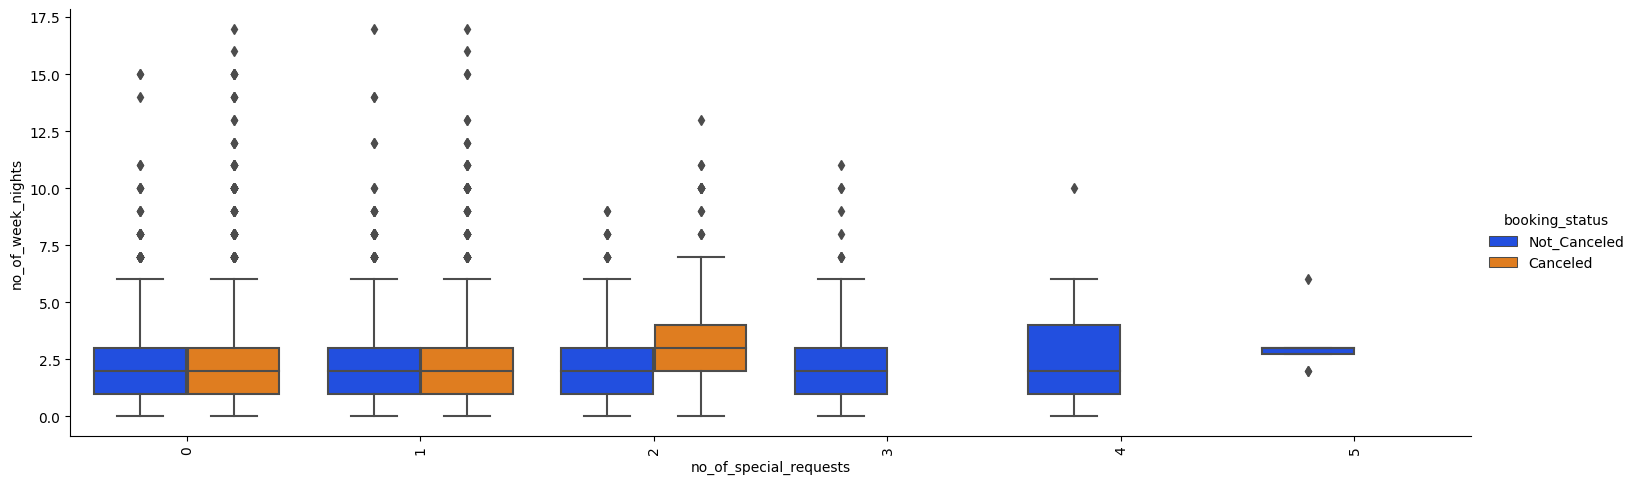

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='no_of_special_requests', y='no_of_week_nights', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

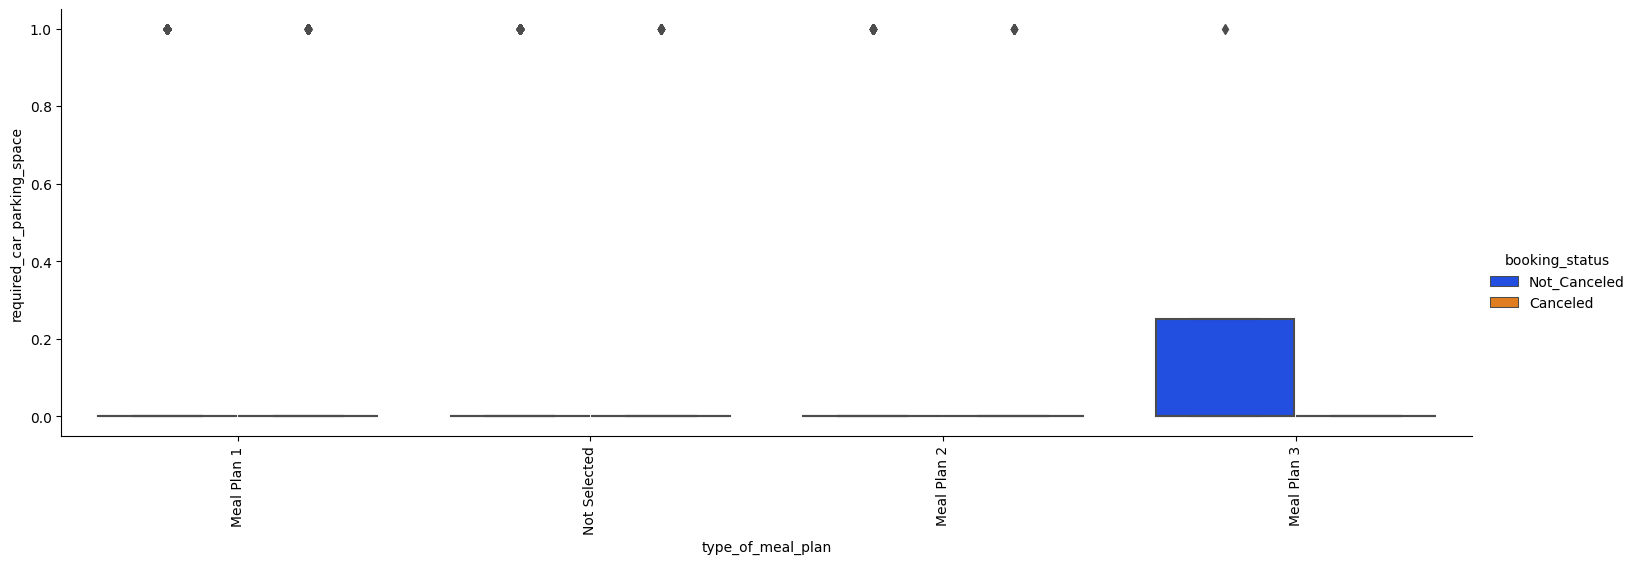

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='type_of_meal_plan', y='required_car_parking_space', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

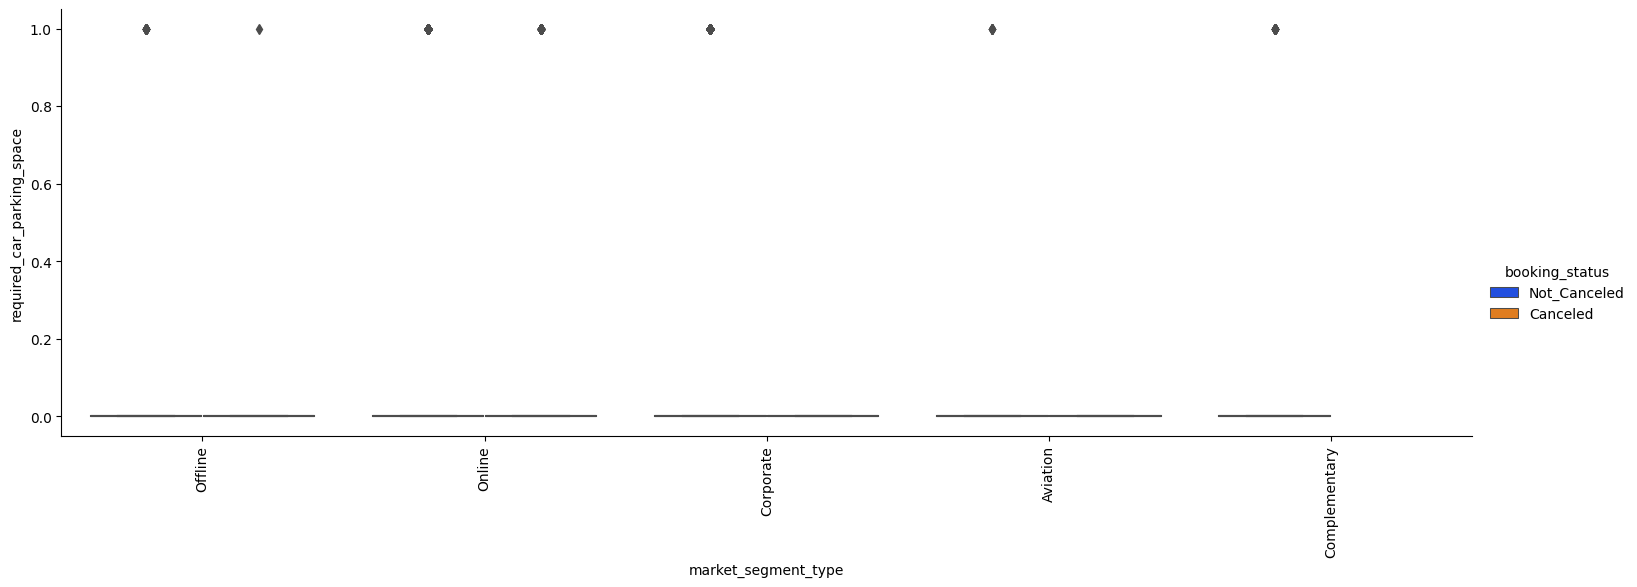

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='market_segment_type', y='required_car_parking_space', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

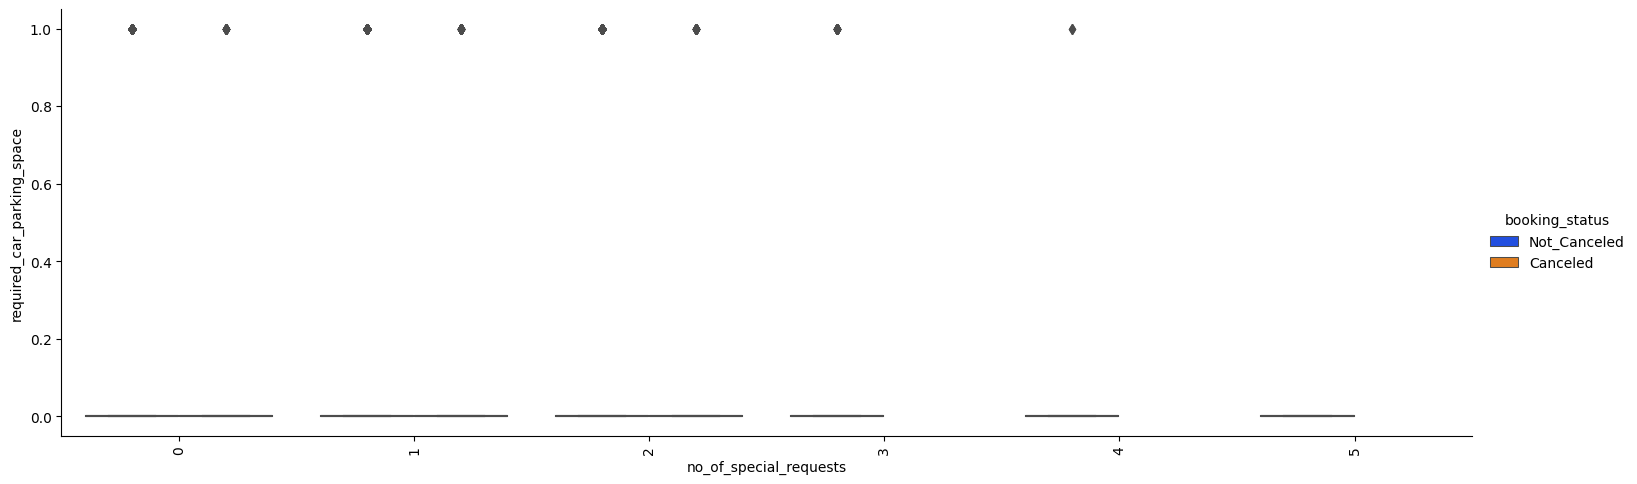

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='no_of_special_requests', y='required_car_parking_space', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

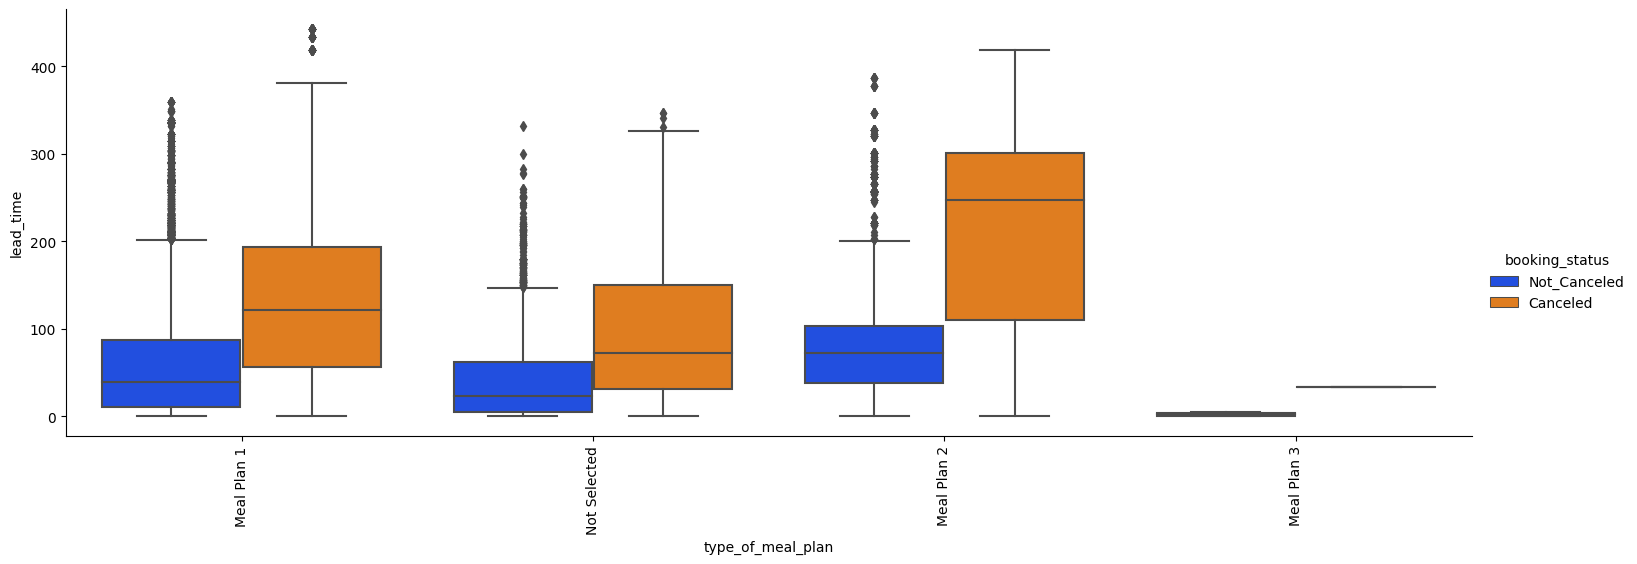

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='type_of_meal_plan', y='lead_time', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

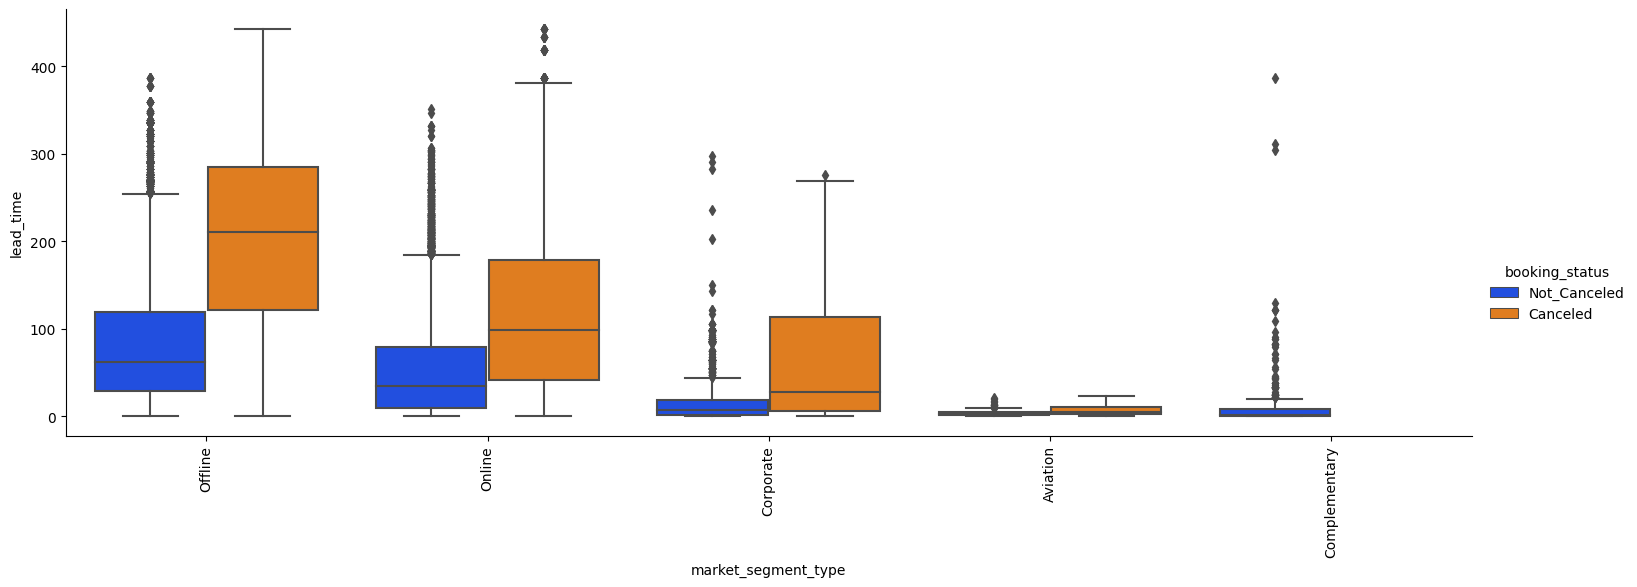

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='market_segment_type', y='lead_time', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

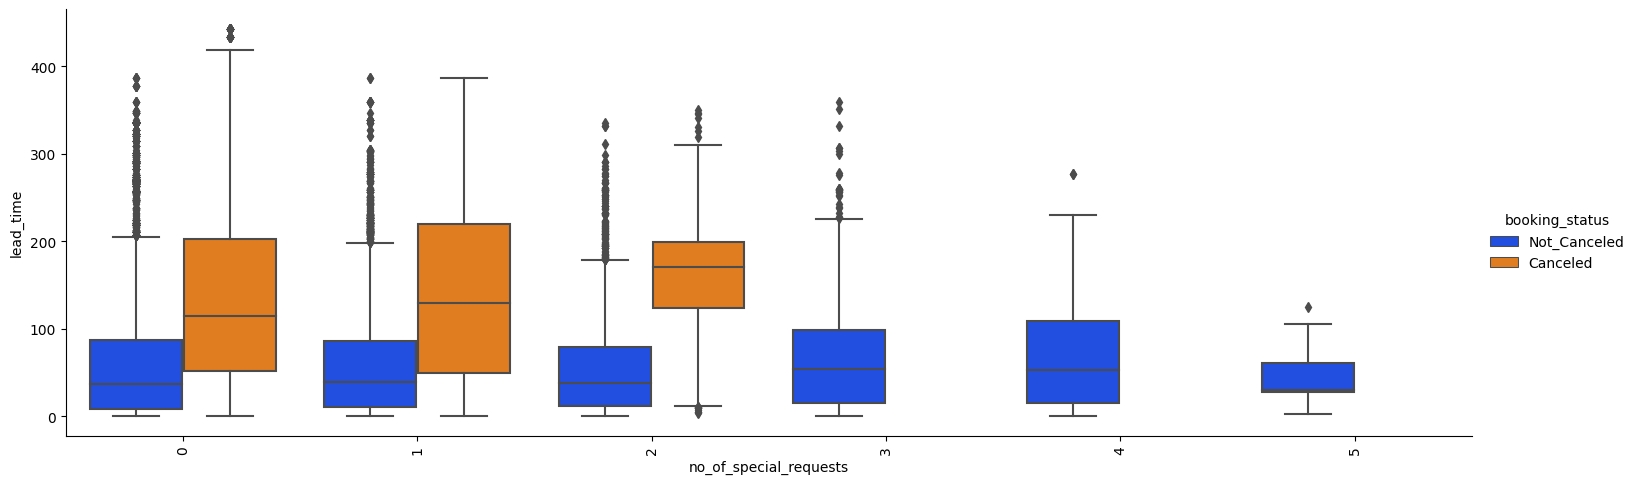

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='no_of_special_requests', y='lead_time', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

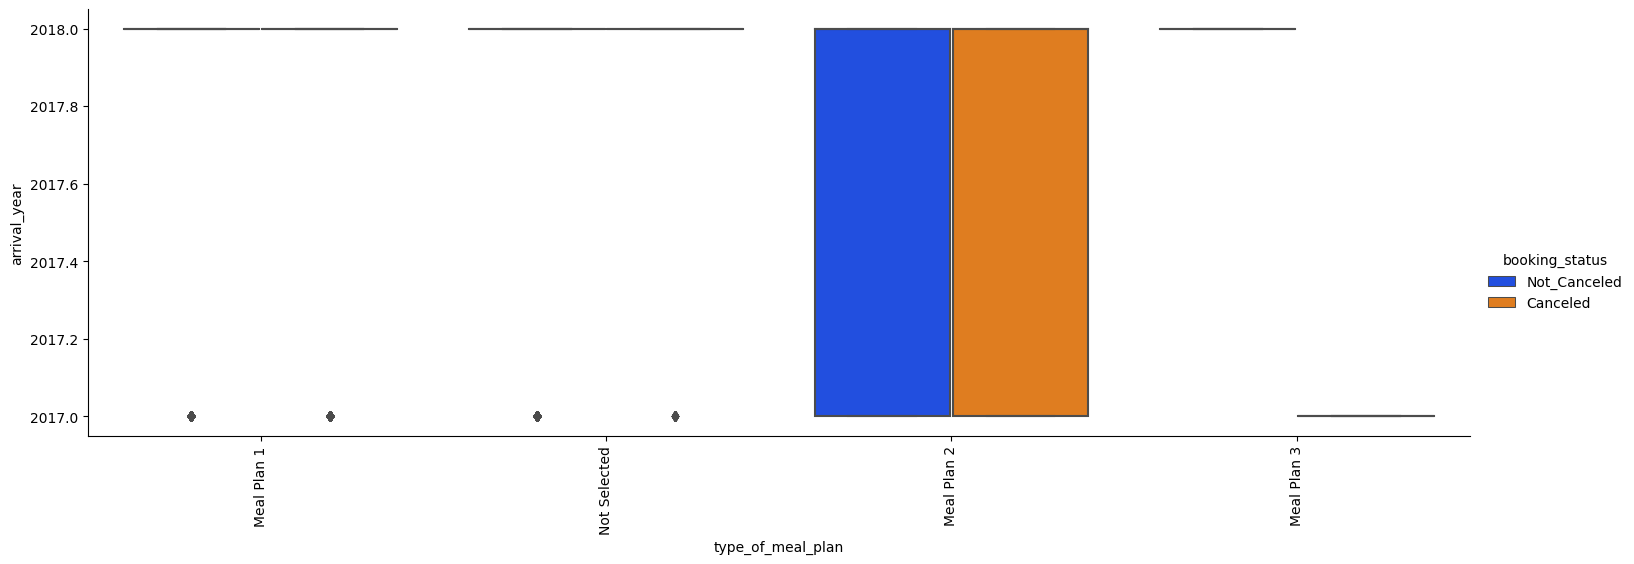

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='type_of_meal_plan', y='arrival_year', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

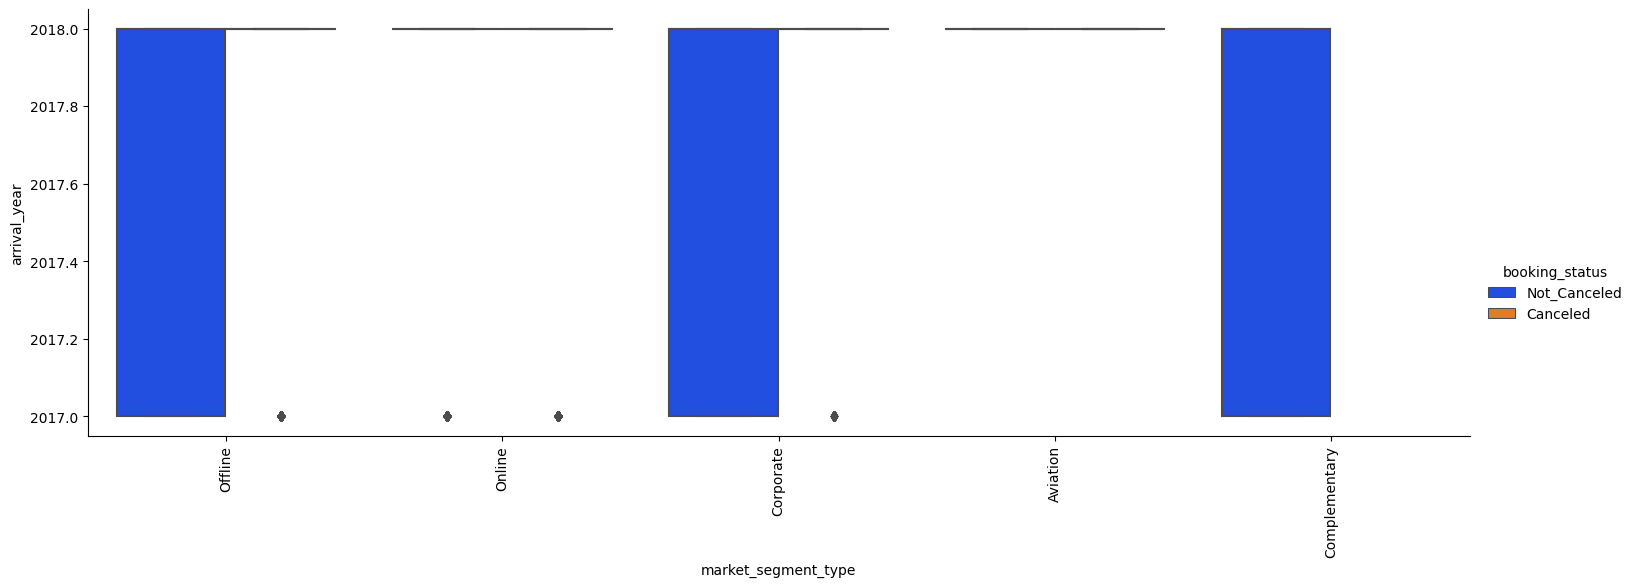

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='market_segment_type', y='arrival_year', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

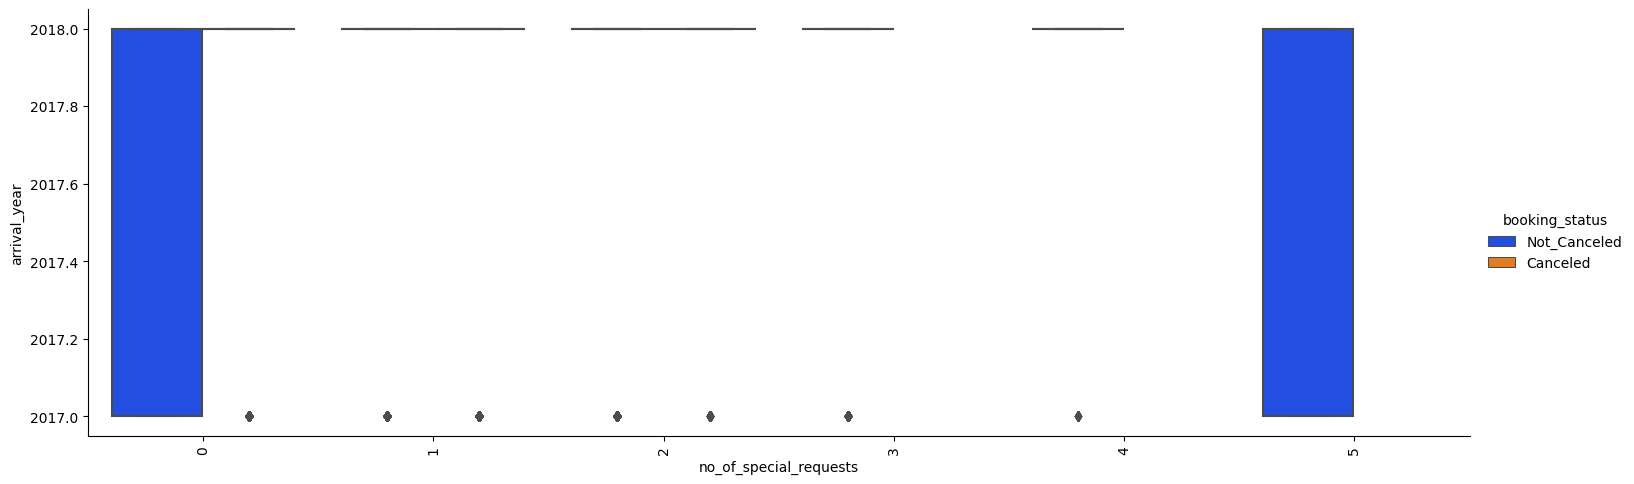

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='no_of_special_requests', y='arrival_year', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

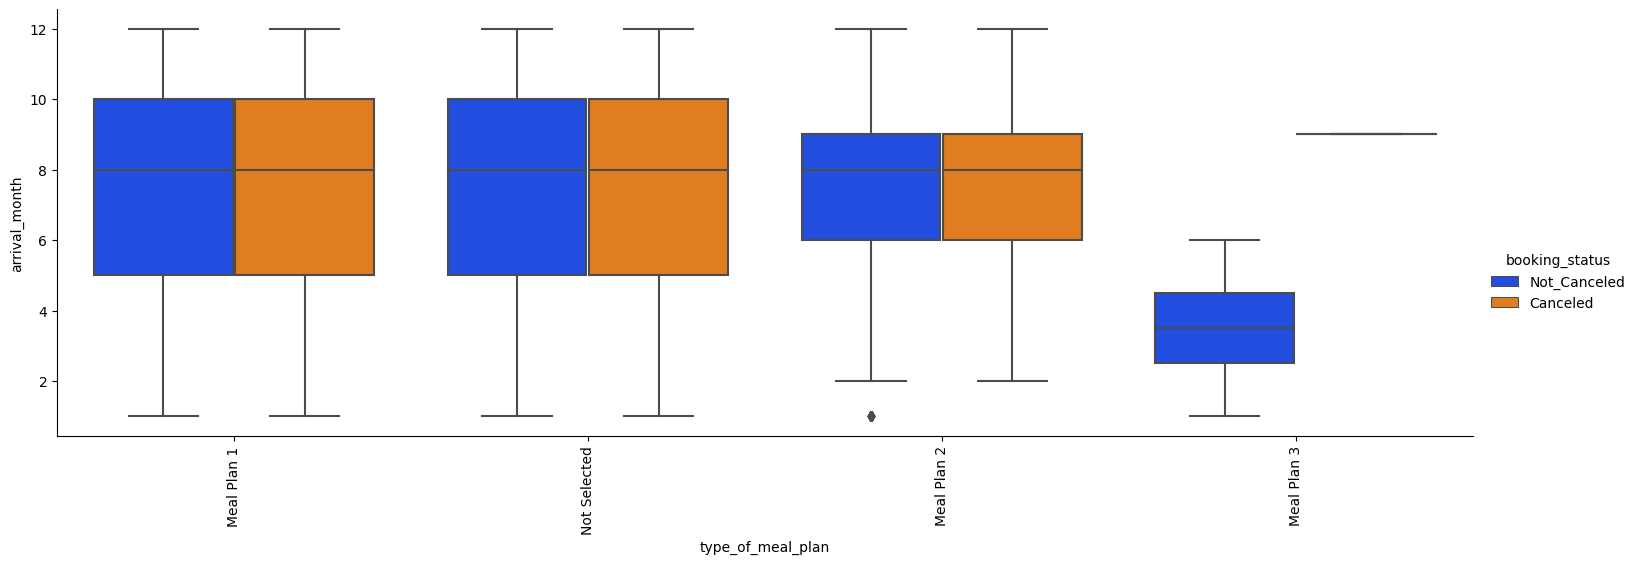

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='type_of_meal_plan', y='arrival_month', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

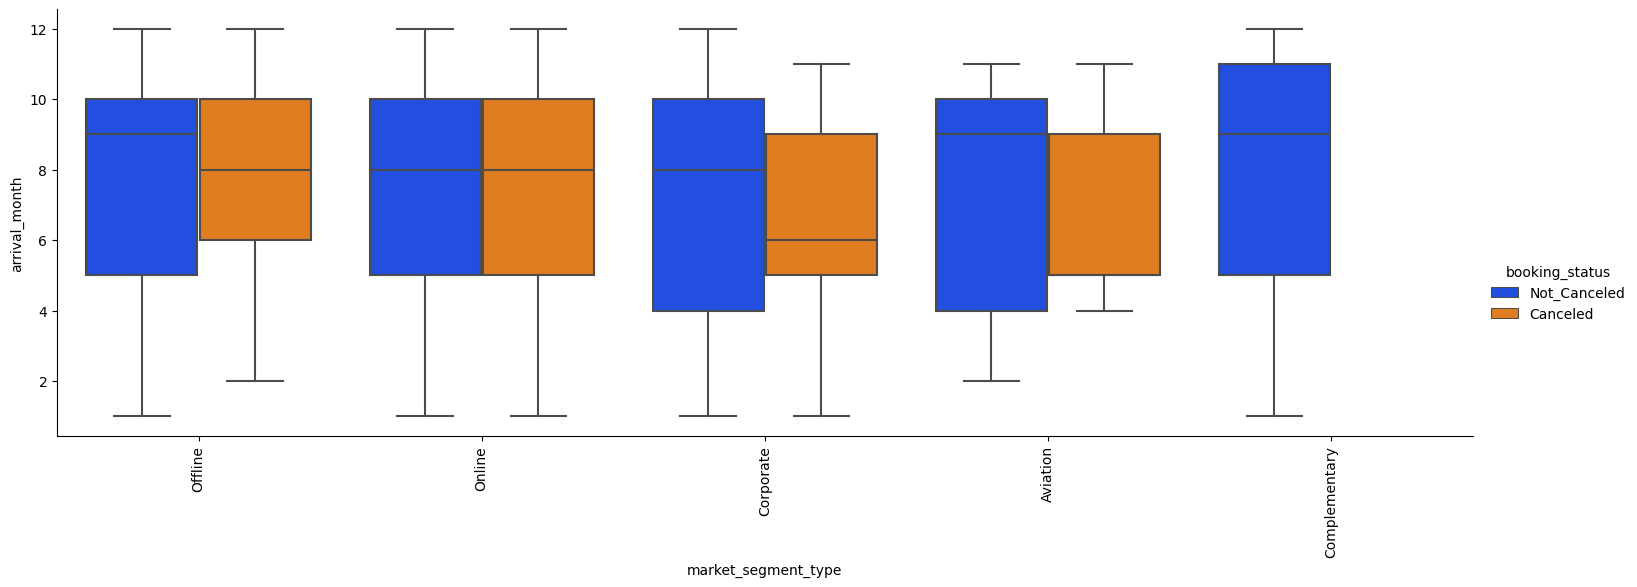

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='market_segment_type', y='arrival_month', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

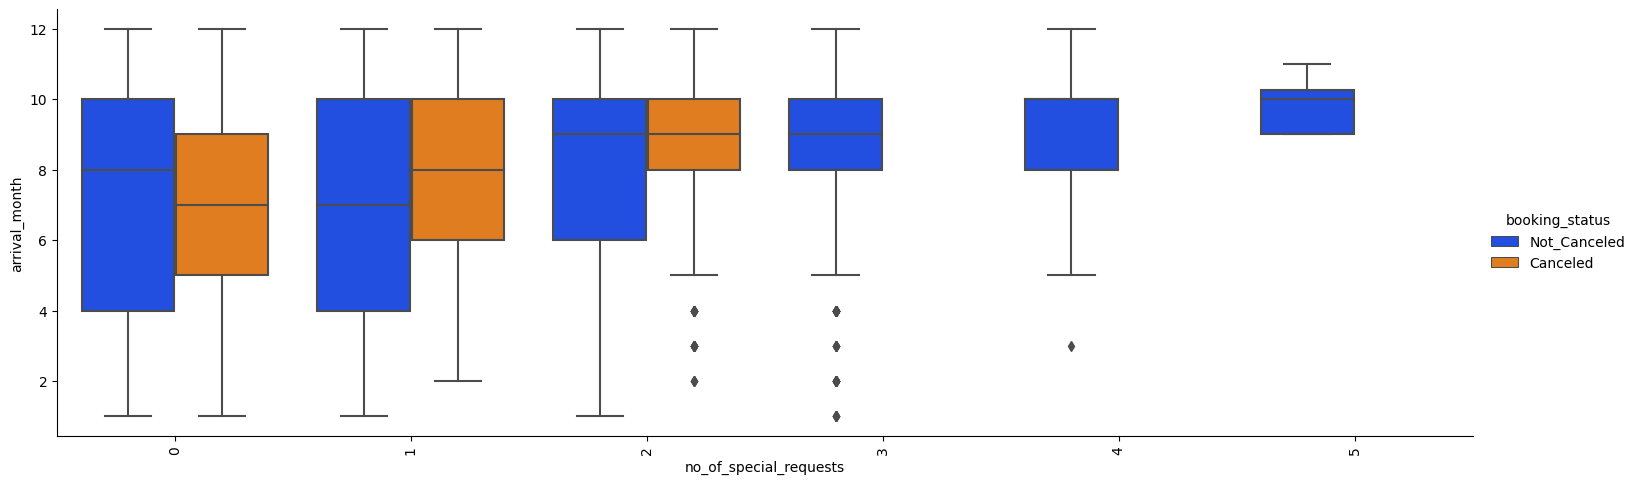

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='no_of_special_requests', y='arrival_month', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

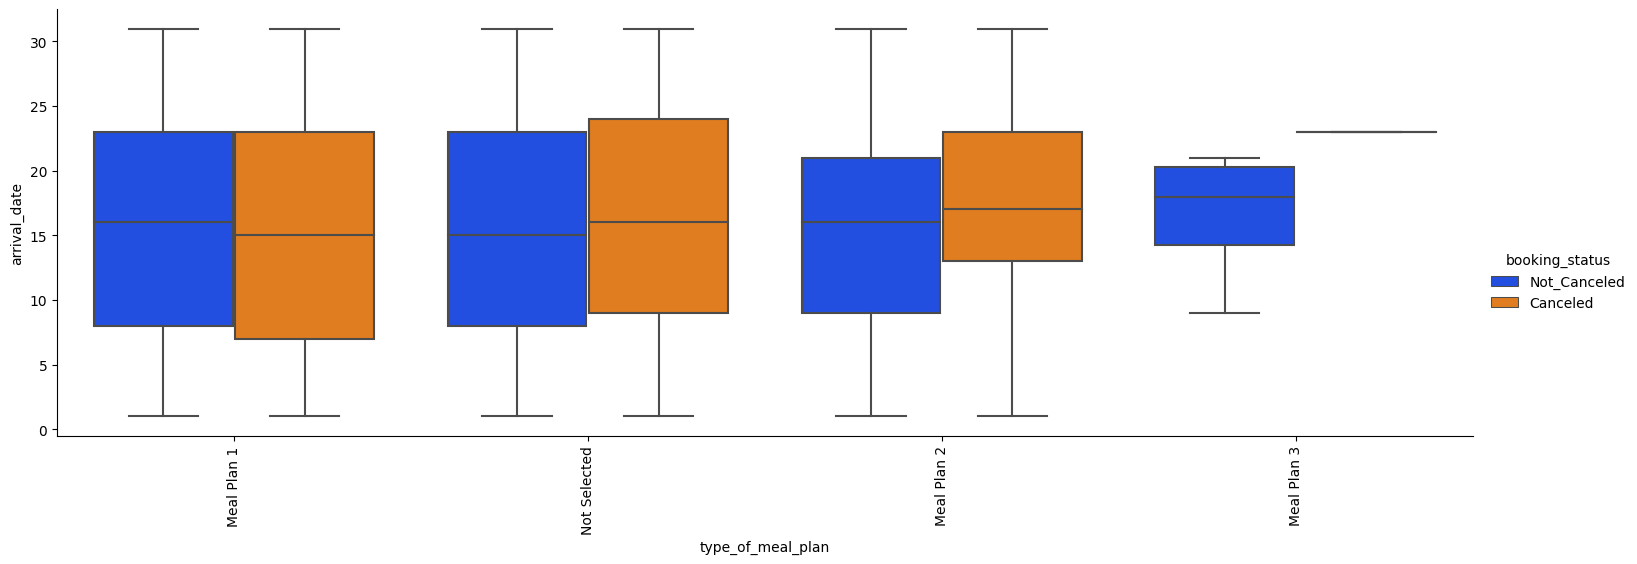

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='type_of_meal_plan', y='arrival_date', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

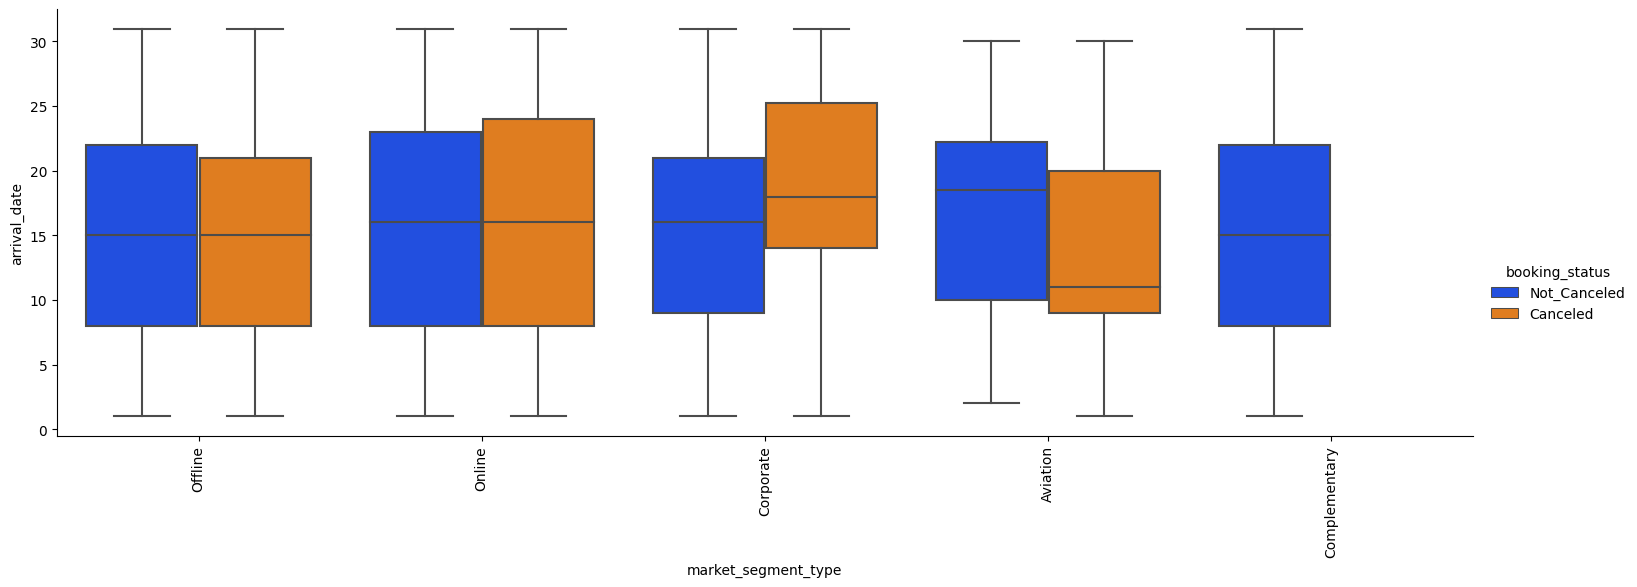

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='market_segment_type', y='arrival_date', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

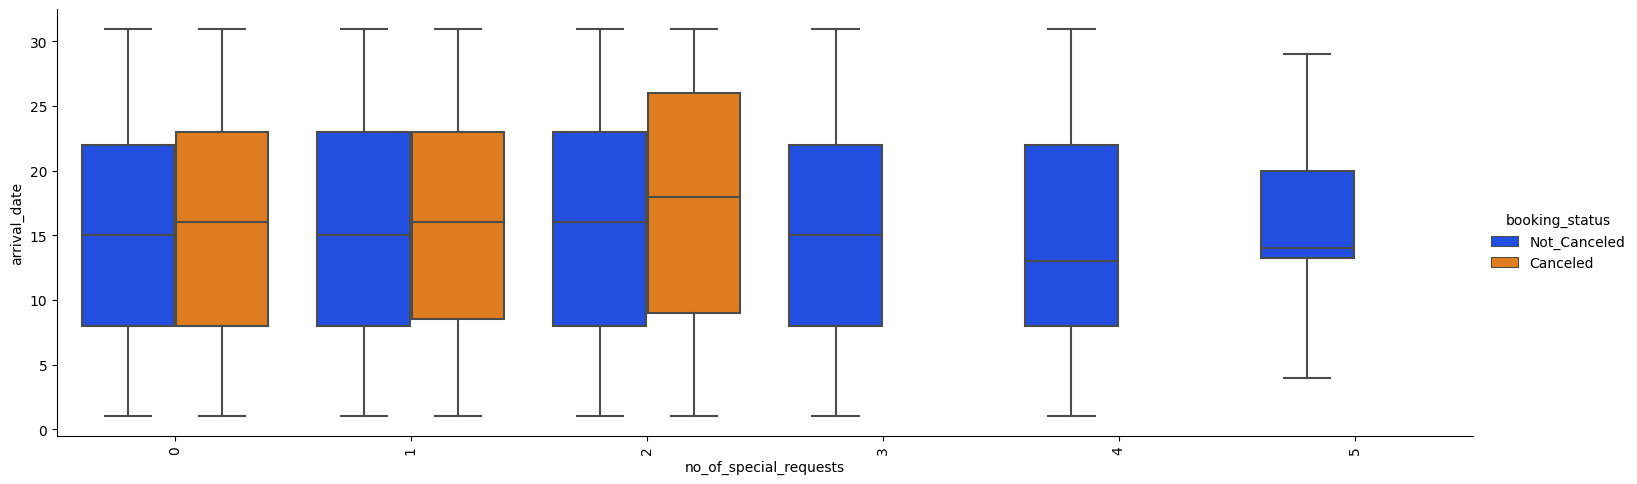

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='no_of_special_requests', y='arrival_date', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

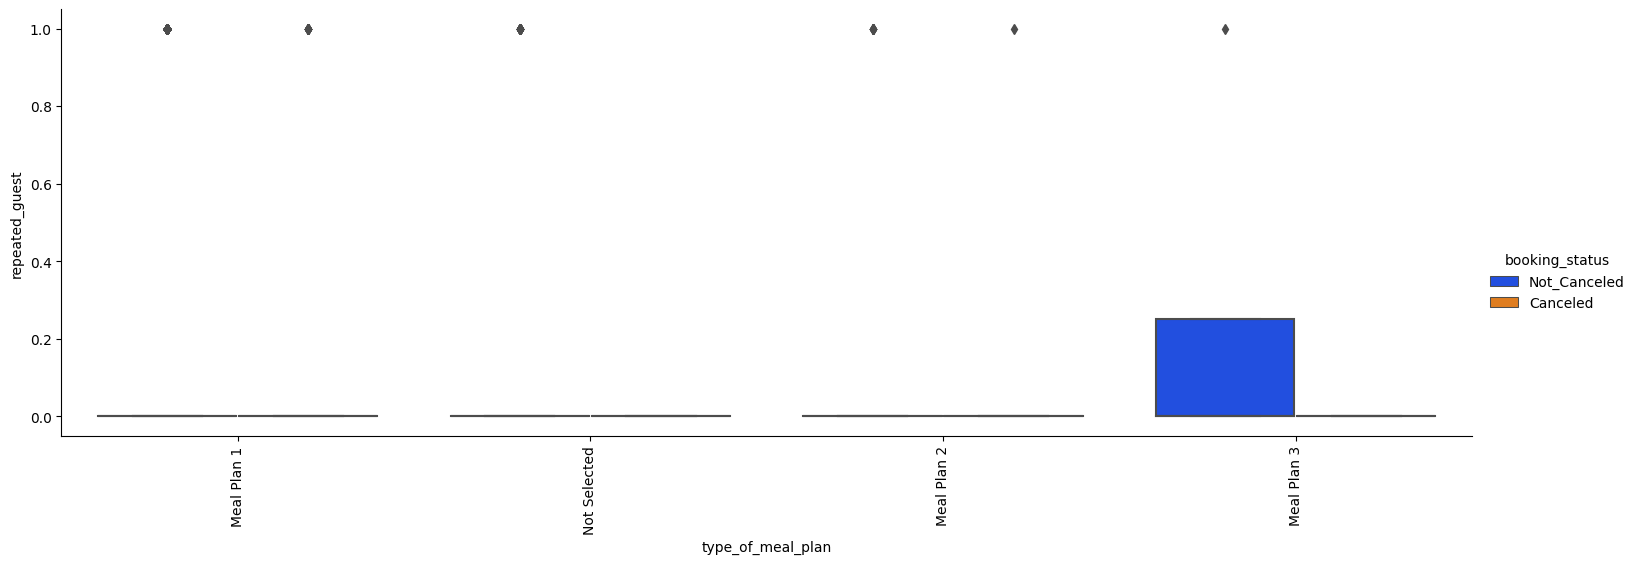

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='type_of_meal_plan', y='repeated_guest', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

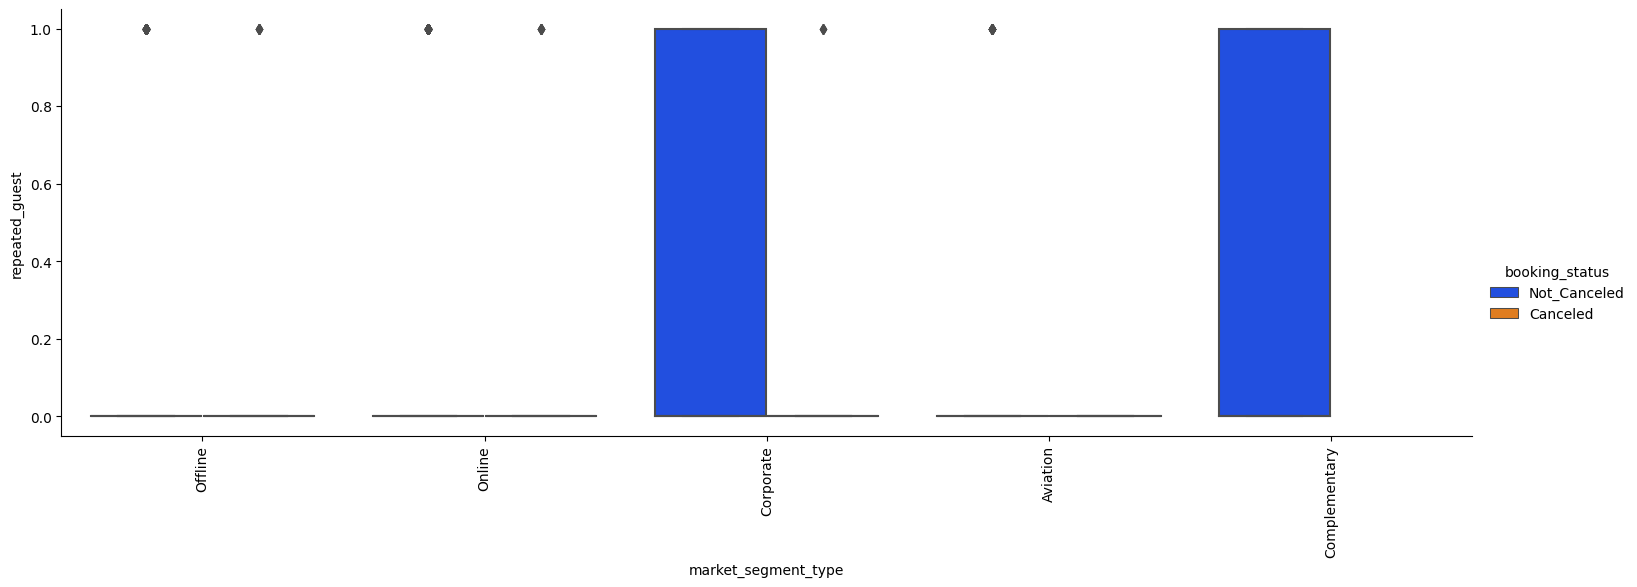

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='market_segment_type', y='repeated_guest', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

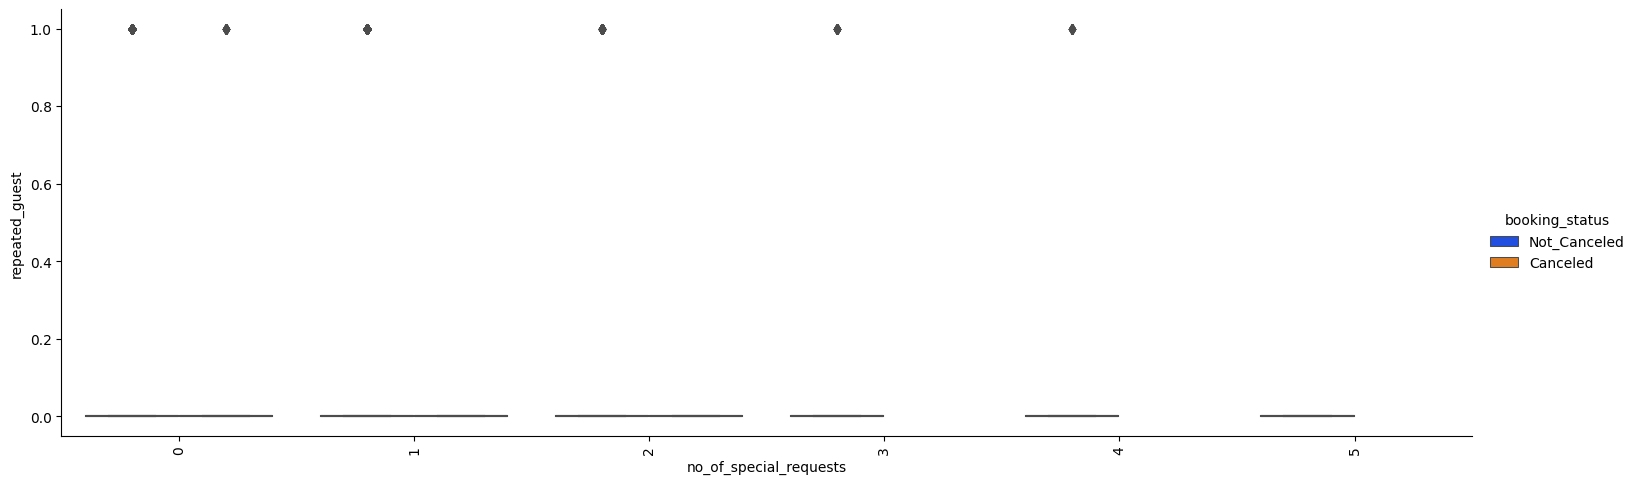

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='no_of_special_requests', y='repeated_guest', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

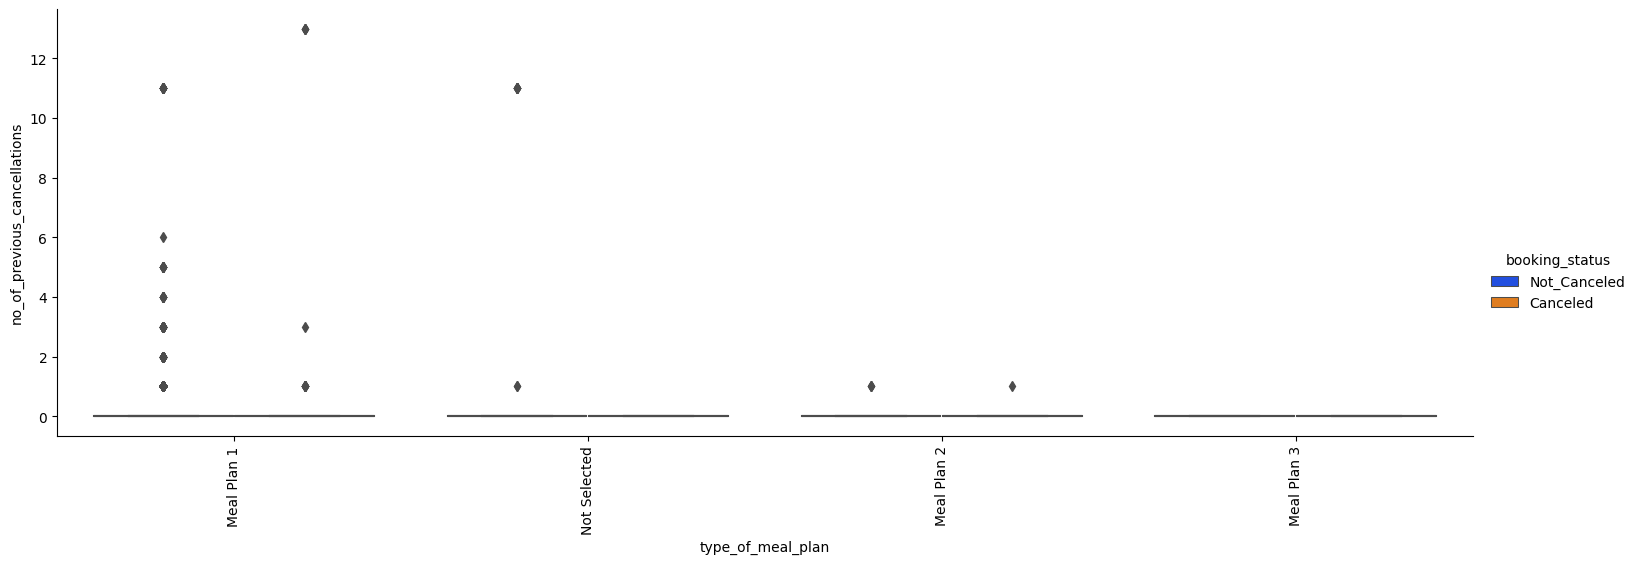

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='type_of_meal_plan', y='no_of_previous_cancellations', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

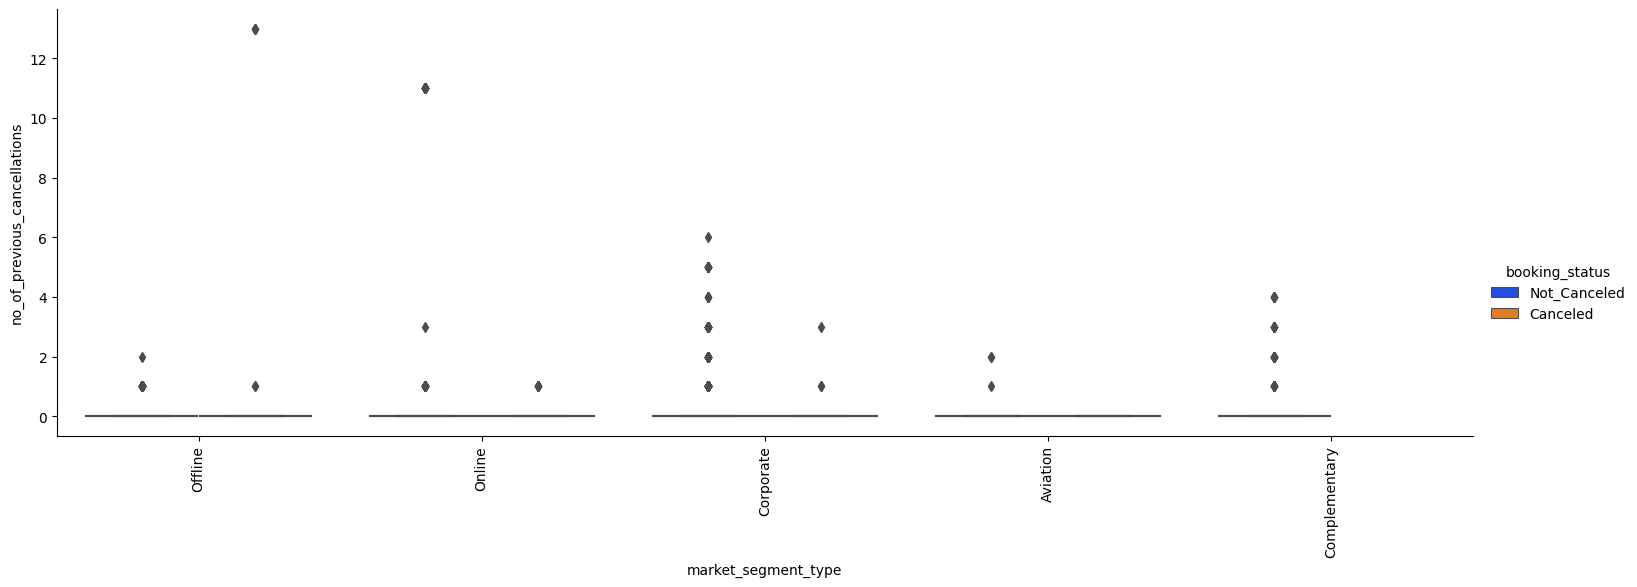

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='market_segment_type', y='no_of_previous_cancellations', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

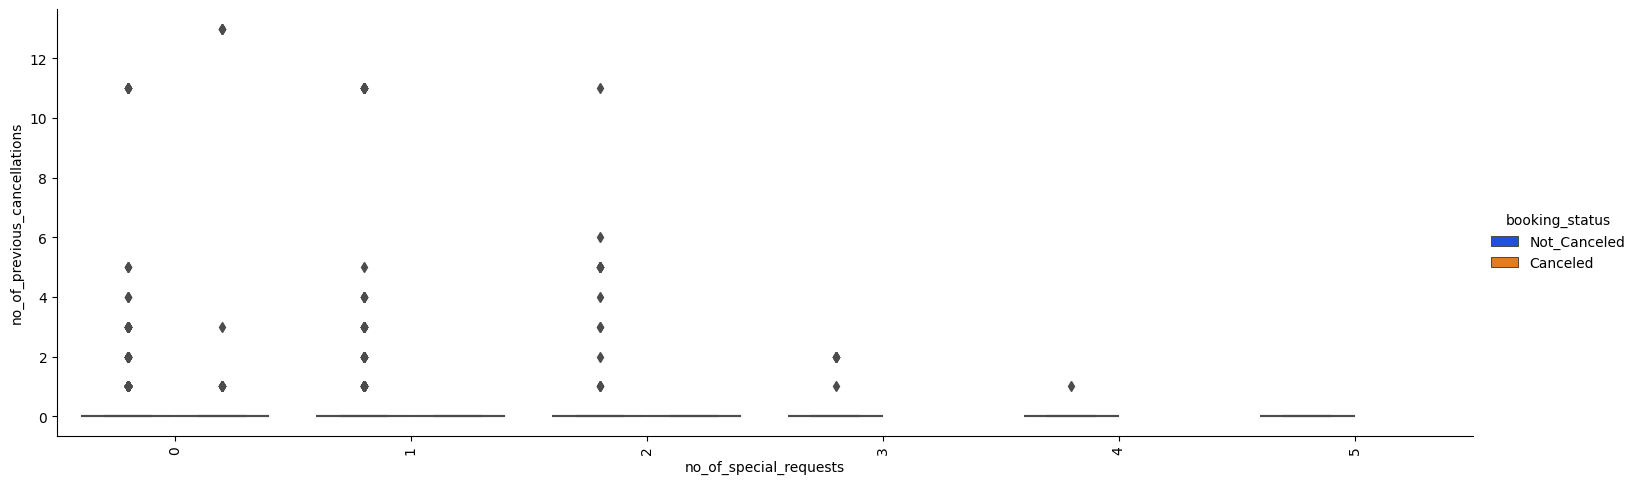

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='no_of_special_requests', y='no_of_previous_cancellations', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

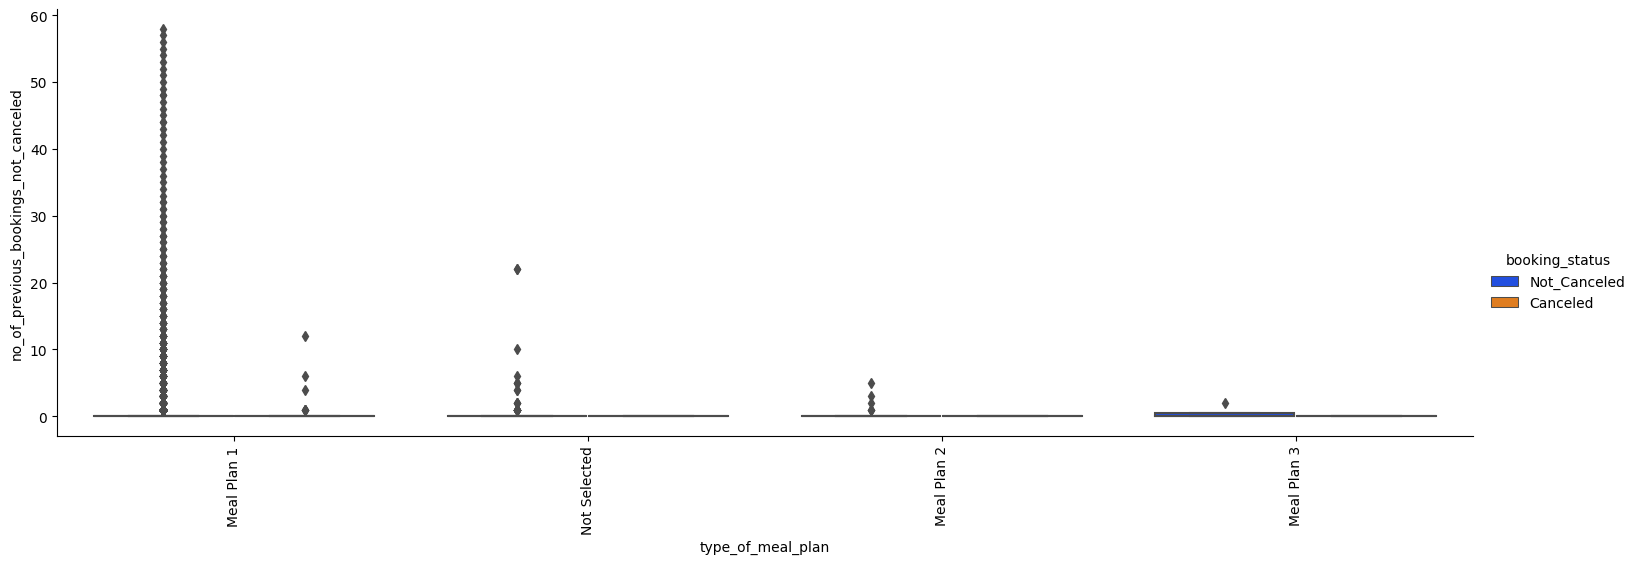

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='type_of_meal_plan', y='no_of_previous_bookings_not_canceled', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

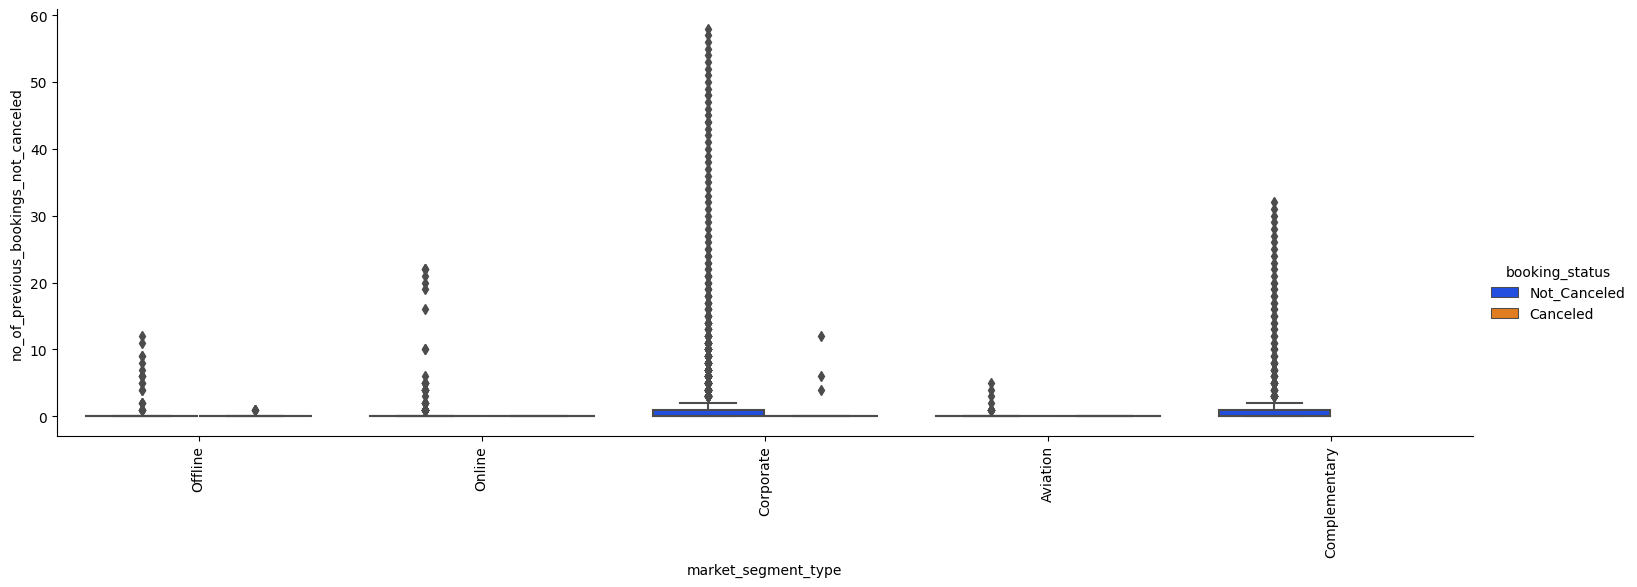

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='market_segment_type', y='no_of_previous_bookings_not_canceled', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

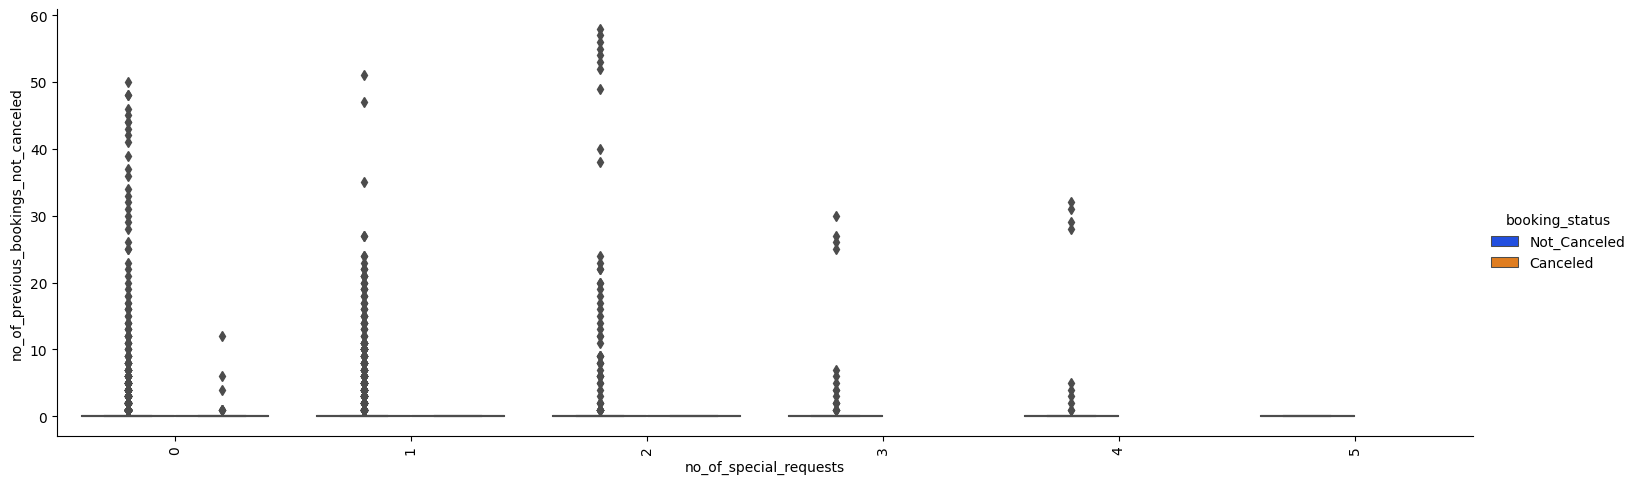

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='no_of_special_requests', y='no_of_previous_bookings_not_canceled', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

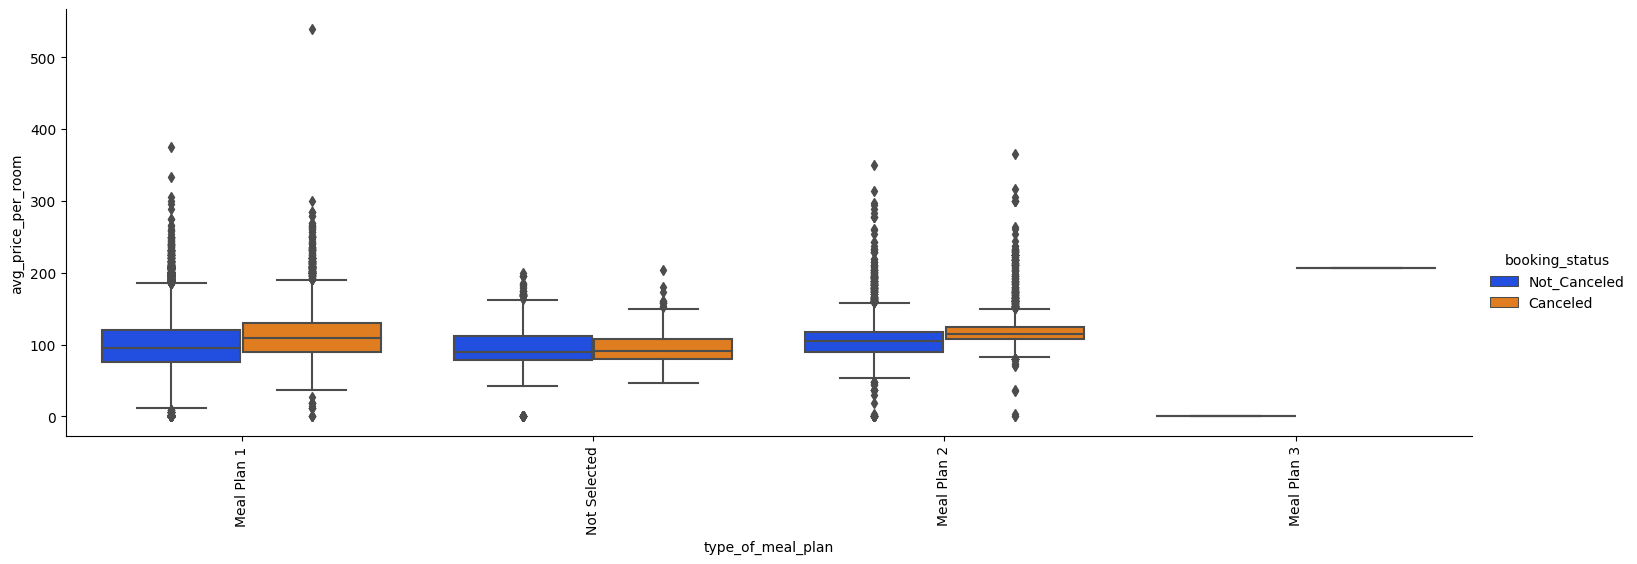

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='type_of_meal_plan', y='avg_price_per_room', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

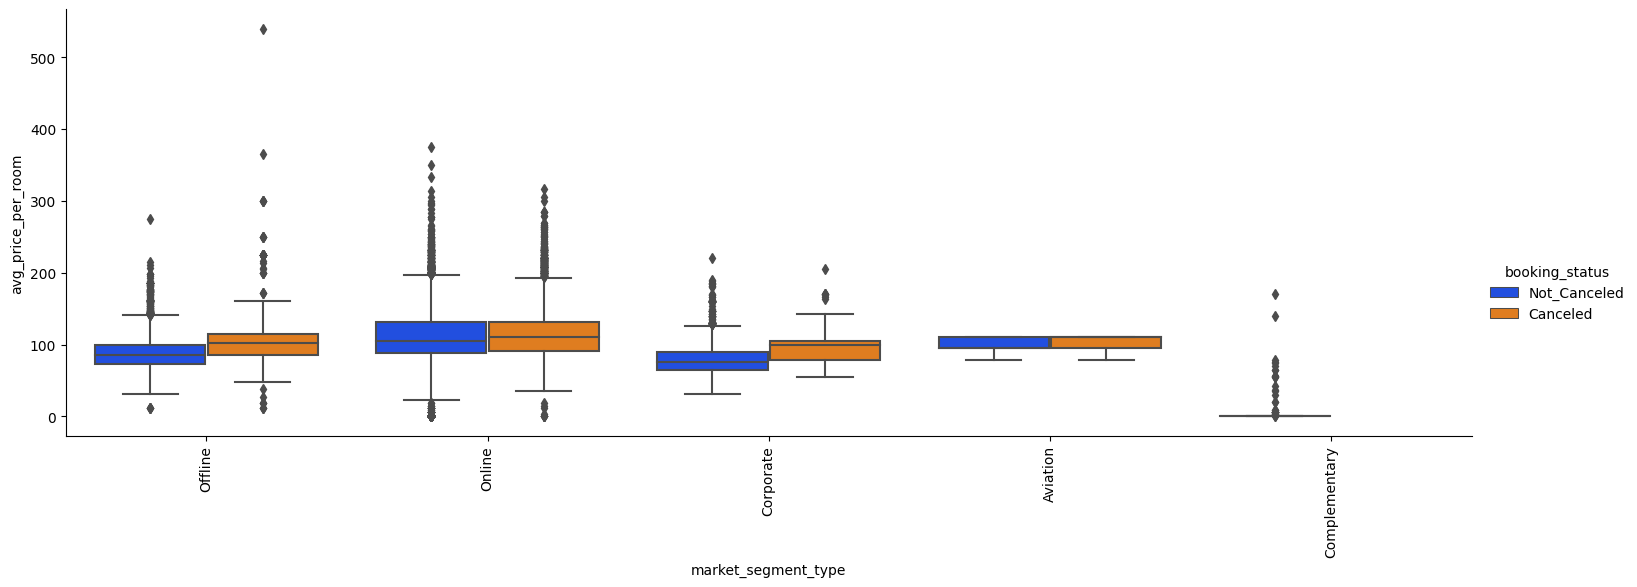

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='market_segment_type', y='avg_price_per_room', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x1500 with 0 Axes>

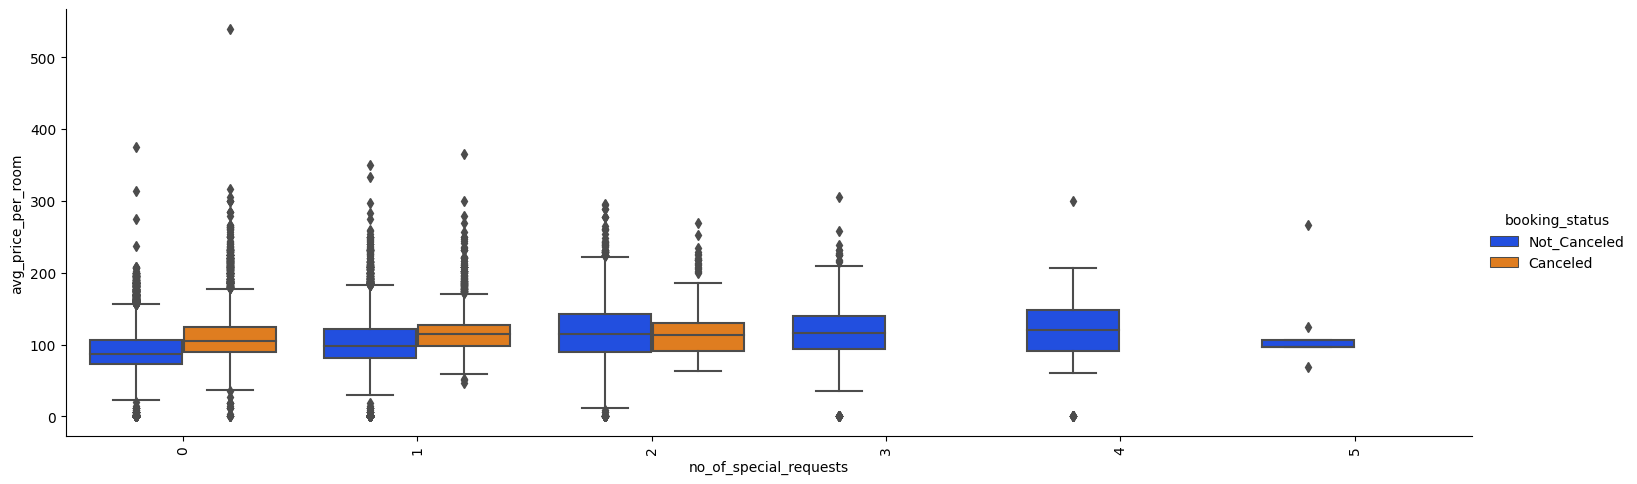

In [ ]:
plt.figure(figsize=(25,15))
sns.catplot(data=inn, x='no_of_special_requests', y='avg_price_per_room', hue='booking_status', kind='box',palette ='bright',legend_out=True, aspect=3)
plt.xticks(rotation=90)
plt.show()

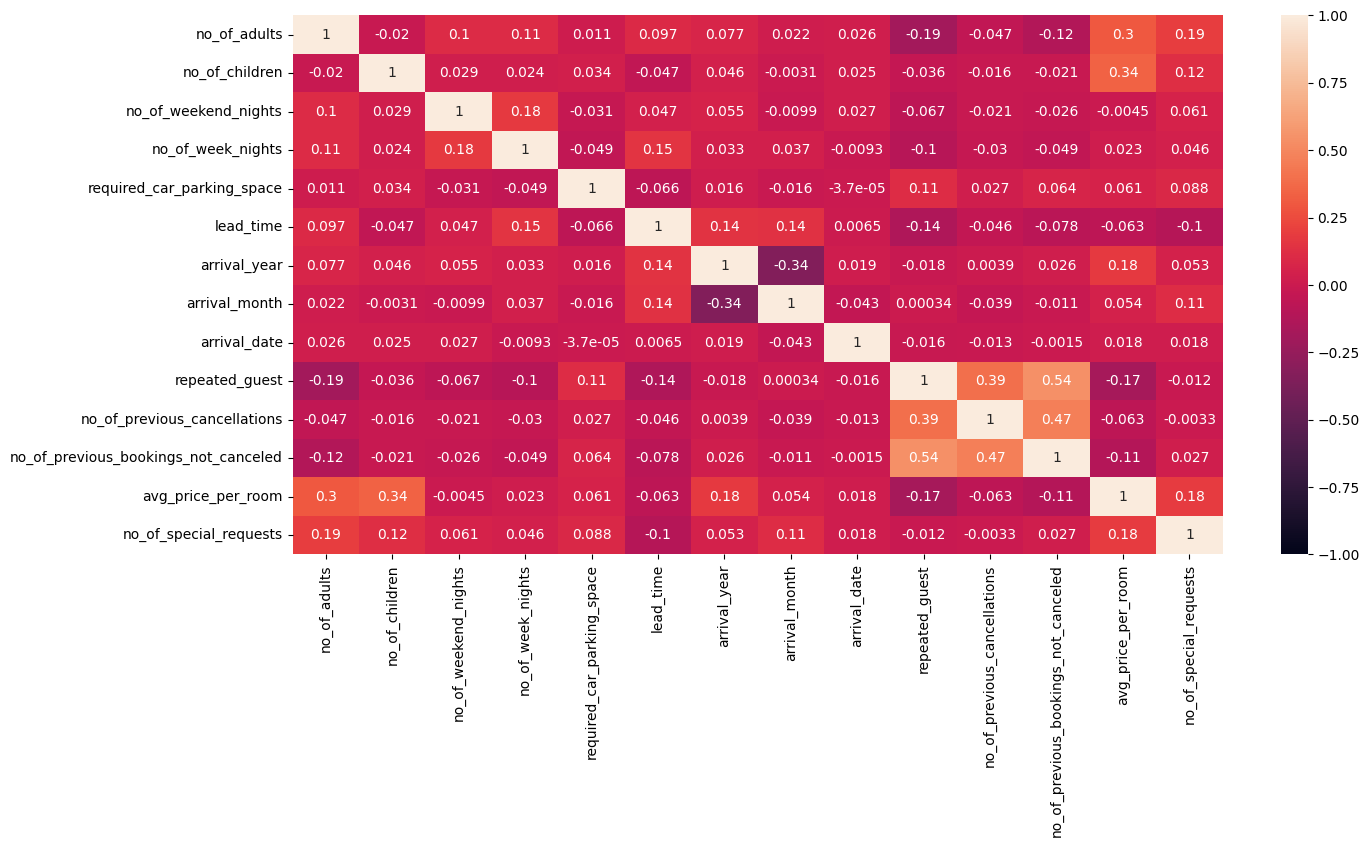

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(inn.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

####Observations

- Apart from no_of_previous_bookings_not_canceled showing slight positive correlation with repeate_guest and no_of_previous_cancelations, all other variables show no to very minimal correlations.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
inn.sample(10)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
4993              1               0                     2                  2   
17362             2               2                     2                  1   
19931             2               0                     1                  0   
16989             2               2                     0                  2   
19087             2               0                     1                  1   
1528              2               0                     0                  3   
17568             1               0                     0                  3   
6230              2               0                     0                  1   
27063             1               0                     0                  1   
22316             2               0                     2                  5   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
4993        Meal Plan 1                           0        Room_Type 1   
17362       Meal Plan 1                           0        Room_Type 6   
19931      Not Selected                           0        Room_Type 1   
16989       Meal Plan 1                           0        Room_Type 6   
19087       Meal Plan 1                           0        Room_Type 1   
1528        Meal Plan 1                           0        Room_Type 4   
17568       Meal Plan 1                           0        Room_Type 1   
6230        Meal Plan 1                           0        Room_Type 4   
27063       Meal Plan 1                           0        Room_Type 1   
22316       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
4993         202          2018             11             6   
17362          6          2018              8            28   
19931         54          2018              4            18   
16989        104          2018              4            27   
19087         36          2018             12             3   
1528          74          2018              3            24   
17568         71          2018              6            14   
6230          53          2018              4             2   
27063          5          2017             10            21   
22316        115          2017              7            29   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
4993            Corporate               1                             3   
17362              Online               0                             0   
19931              Online               0                             0   
16989              Online               0                             0   
19087       Complementary               0                             0   
1528               Online               0                             0   
17568             Offline               0                             0   
6230               Online               0                             0   
27063              Online               0                             0   
22316              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
4993                                      6            40.00000   
17362                                     0           228.00000   
19931                                     0            85.50000   
16989                                     0           186.30000   
19087                                     0             0.00000   
1528                                      0           114.30000   
17568                                     0           120.00000   
6230                                      0           123.30000   
27063                                     0             0.00000   
22316                                     0            76.50000   

       no_of_special_requests booking_status  
4993  

In [ ]:
innh=inn.copy()

In [ ]:
innh.sample(10)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
7432              1               0                     1                  0   
28584             2               0                     1                  5   
986               2               0                     0                  4   
6911              2               0                     0                  2   
17169             2               0                     0                  3   
17463             3               0                     0                  1   
30625             2               0                     4                  7   
1387              2               0                     0                  3   
10790             2               0                     1                  2   
14770             2               0                     2                  1   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
7432       Not Selected                           0        Room_Type 1   
28584       Meal Plan 1                           0        Room_Type 4   
986         Meal Plan 1                           0        Room_Type 1   
6911        Meal Plan 2                           0        Room_Type 1   
17169       Meal Plan 1                           0        Room_Type 1   
17463       Meal Plan 1                           0        Room_Type 1   
30625       Meal Plan 1                           0        Room_Type 4   
1387        Meal Plan 1                           0        Room_Type 1   
10790       Meal Plan 1                           0        Room_Type 1   
14770       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
7432          20          2018              9            12   
28584          8          2018              8            22   
986           88          2018              3            23   
6911         102          2017             10            16   
17169        213          2018              6             7   
17463          6          2018              3             4   
30625        122          2018              7            23   
1387          26          2017             10             7   
10790         46          2018             11            11   
14770         47          2018              1            23   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
7432               Online               0                             0   
28584              Online               0                             0   
986                Online               0                             0   
6911              Offline               0                             0   
17169             Offline               0                             0   
17463              Online               0                             0   
30625              Online               0                             0   
1387               Online               0                             0   
10790             Offline               0                             0   
14770             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
7432                                      0            89.00000   
28584                                     0            99.46000   
986                                       0            88.70000   
6911                                      0           109.00000   
17169                                     0           130.00000   
17463                                     0           140.00000   
30625                                     0            87.58000   
1387                                      0           114.67000   
10790                                     0            75.00000   
14770                                     0            60.00000   

       no_of_special_requests booking_status  
7432  

In [ ]:
innh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [ ]:
for feature in innh.columns:
    if innh[feature].dtype == 'object':
        innh[feature] = pd.Categorical(innh[feature])
innh.head(10)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   
5             2               0                     0                  2   
6             2               0                     1                  3   
7             2               0                     1                  3   
8             3               0                     0                  4   
9             2               0                     0                  5   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   
5       Meal Plan 2                           0        Room_Type 1        346   
6       Meal Plan 1                           0        Room_Type 1         34   
7       Meal Plan 1                           0        Room_Type 4         83   
8       Meal Plan 1                           0        Room_Type 1        121   
9       Meal Plan 1                           0        Room_Type 4         44   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   
5          2018              9            13              Online   
6          2017             10            15              Online   
7          2018             12            26              Online   
8          2018              7             6             Offline   
9          2018             10            18              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   
5               0                             0   
6               0                             0   
7               0                             0   
8               0                             0   
9               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   
5                                     0           115.00000   
6                                     0           107.55000   
7                                     0           105.61000   
8                                     0            96.90000   
9                                     0           133.44000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled  
5          

In [ ]:
innh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  int64   
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

###Understanding the distributions of categorical variables

In [ ]:
innh['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [ ]:
innh['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [ ]:
innh['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

####Understanding the distribution of arrival year, month and day

In [ ]:
innh['arrival_year'].value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

In [ ]:
innh['arrival_month'].unique()

array([10, 11,  2,  5,  4,  9, 12,  7,  6,  8,  3,  1])

In [ ]:
innh['arrival_date'].unique()

array([ 2,  6, 28, 20, 11, 13, 15, 26, 18, 30,  5, 10,  4, 25, 22, 21, 19,
       17,  7,  9, 27,  1, 29, 16,  3, 24, 14, 31, 23,  8, 12])

####Understanding the distribution of the dependant variable

In [ ]:
innh['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [ ]:
innh['booking_status'].value_counts(1)

Not_Canceled   0.67236
Canceled       0.32764
Name: booking_status, dtype: float64

In [ ]:
replaceStruct = {
                'type_of_meal_plan':     {'Meal Plan 1': 1, 'Meal Plan 2': 2 , 'Meal Plan 3': 3, 'Not Selected': 0},
                'room_type_reserved': {'Room_Type 3': 1, 'Room_Type 7':2 , 'Room_Type 5': 3, 'Room_Type 2': 4,'Room_Type 6': 5, 'Room_Type 4' : 6, 'Room_Type 1': 7},
                 'market_segment_type': {'Aviation': 1, 'Complementary':2 , 'Corporate': 3, 'Offline': 4, 'Online': 5},
                 'booking_status':     {'Canceled': 1, 'Not_Canceled': 0 }
                    }


In [ ]:
innh=innh.replace(replaceStruct)
innh.head(10)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   
5             2               0                     0                  2   
6             2               0                     1                  3   
7             2               0                     1                  3   
8             3               0                     0                  4   
9             2               0                     0                  5   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0                 1                           0                  7        224   
1                 0                           0                  7          5   
2                 1                           0                  7          1   
3                 1                           0                  7        211   
4                 0                           0                  7         48   
5                 2                           0                  7        346   
6                 1                           0                  7         34   
7                 1                           0                  6         83   
8                 1                           0                  7        121   
9                 1                           0                  6         44   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2                   4   
1          2018             11             6                   5   
2          2018              2            28                   5   
3          2018              5            20                   5   
4          2018              4            11                   5   
5          2018              9            13                   5   
6          2017             10            15                   5   
7          2018             12            26                   5   
8          2018              7             6                   4   
9          2018             10            18                   5   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   
5               0                             0   
6               0                             0   
7               0                             0   
8               0                             0   
9               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   
5                                     0           115.00000   
6                                     0           107.55000   
7                                     0           105.61000   
8                                     0            96.90000   
9                                     0           133.44000   

   no_of_special_requests booking_status  
0                       0              0  
1                       1              0  
2                       0              1  
3                       0              1  
4                       0              1  
5          

In [ ]:
innh.shape

(36275, 18)

In [ ]:
innh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  int64   
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

In [ ]:
innh.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

## EDA

- It is a good idea to explore the data once again after manipulating it.

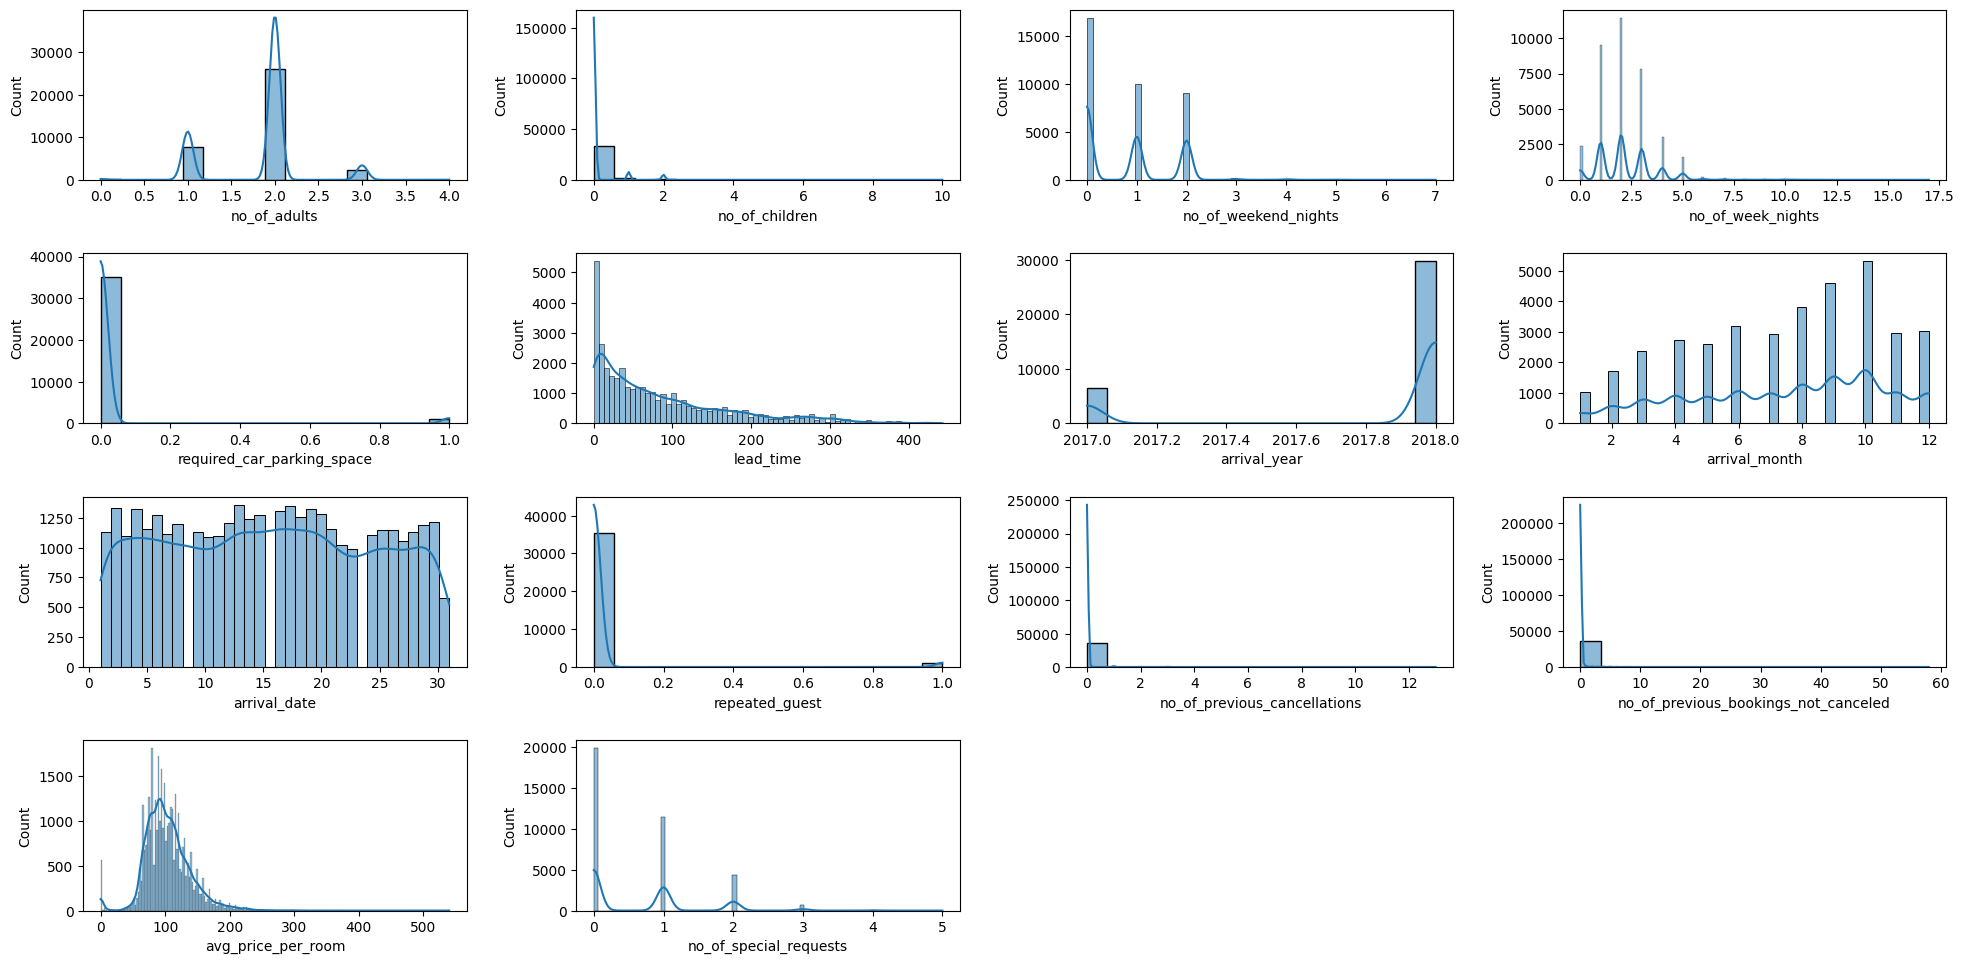

In [ ]:
num_cols = innh.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(innh,x=innh[variable],kde=True)
    plt.tight_layout(pad=2)

plt.show()

### Splitting data into train and test

In [ ]:
X = innh.drop(['booking_status'], axis=1)
Y = innh['booking_status']

# adding a contstant to X variable
X = add_constant(X)



# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 18)
Shape of test set :  (10883, 18)
Percentage of classes in training set:
0   0.67238
1   0.32762
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67233
1   0.32767
Name: booking_status, dtype: float64


In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building a Logistic Regression model

In [ ]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.433174
         Iterations 16


In [ ]:

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25374
Method:                           MLE   Df Model:                           17
Date:                Fri, 14 Apr 2023   Pseudo R-squ.:                  0.3151
Time:                        11:19:25   Log-Likelihood:                -10999.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1021.2736    117.903     -8.662      0.000   -1252.358    -790.189
no_of_adults                            -0.0370      

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80395 0.61931    0.73991 0.67426

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

feature            VIF
0                                  const 38556449.75245
1                           no_of_adults        1.25501
2                         no_of_children        1.29890
3                   no_of_weekend_nights        1.06021
4                      no_of_week_nights        1.07657
5                      type_of_meal_plan        1.35264
6             required_car_parking_space        1.02889
7                     room_type_reserved        1.27861
8                              lead_time        1.29912
9                           arrival_year        1.39546
10                         arrival_month        1.27193
11                          arrival_date        1.00600
12                   market_segment_type        1.63731
13                        repeated_guest        1.63850
14          no_of_previous_cancellations        1.31356
15  no_of_previous_bookings_not_canceled        1.56069
16                    avg_price_per_room        1.66919
17                no_of_special_requests        1.19473

###Observations

- We observe that there is no multicollinearity present in the data, since all VIF values are below 5.
- Hence, The values of coefficient and p-values are reliable.
- Now to check and remove the insignificant variables (p-value > 0.05) from data.

###Checking and dropping p values greater than 0.05

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests']


In [ ]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [ ]:
# fitting the model on training set
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit()

pred_train1 = lg1.predict(X_train1)
pred_train1 = np.round(pred_train1)


print("Accuracy on training set : ", accuracy_score(y_train, pred_train1))

Optimization terminated successfully.
         Current function value: 0.433315
         Iterations 12
Accuracy on training set :  0.8046628859483301


In [ ]:
# checking summary of the model
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25377
Method:                           MLE   Df Model:                           14
Date:                Fri, 14 Apr 2023   Pseudo R-squ.:                  0.3149
Time:                        11:39:39   Log-Likelihood:                -11003.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1023.9970    117.709     -8.699      0.000   -1254.703    -793.291
no_of_weekend_nights             0.1476      0.020      7.566      0.000     

In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# adding the odds to a dataframe
pd.DataFrame(odds, X_train1.columns, columns=["odds"]).T

const  no_of_weekend_nights  no_of_week_nights  type_of_meal_plan  \
odds 0.00000               1.15901            1.04039            0.83327   

      required_car_parking_space  room_type_reserved  lead_time  arrival_year  \
odds                     0.22266             1.18024    1.01450       1.65332   

      arrival_month  arrival_date  market_segment_type  repeated_guest  \
odds        0.95602       1.00427              3.16473         0.10903   

      no_of_previous_cancellations  avg_price_per_room  no_of_special_requests  
odds                       1.22736             1.01825                 0.24865

In [ ]:
# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# adding the change_odds% to a dataframe
pd.DataFrame(perc_change_odds, X_train1.columns, columns=["change_odds%"]).T

const  no_of_weekend_nights  no_of_week_nights  \
change_odds% -100.00000              15.90140            4.03931   

              type_of_meal_plan  required_car_parking_space  \
change_odds%          -16.67339                   -77.73422   

              room_type_reserved  lead_time  arrival_year  arrival_month  \
change_odds%            18.02418    1.45036      65.33181       -4.39819   

              arrival_date  market_segment_type  repeated_guest  \
change_odds%       0.42724            216.47269       -89.09666   

              no_of_previous_cancellations  avg_price_per_room  \
change_odds%                      22.73584             1.82486   

              no_of_special_requests  
change_odds%               -75.13463

### Coefficient interpretations

- `No of weekend nights`: Holding all other features constant, a unit change in no of weekend nigths will increase the likelihood of a guest canceling bookings by 1.15901 times or a 15.90% increase in the likelihood of a guest canceling his or her bookings.

- `No of week nights`: Holding all other features constant, a unit change in no of week nights will increase the the likelihood of a guest canceling his or her bookings by 1.04039 times or a 4.039% increase in canceling booking.

- `Type of meal plan `: Holding all other features constant, a unit change in type ofmeal plan will increase the likelihood of a guest canceling a booking by 0.83327 times or a -16.67% decrease in the cancelation a booking by a guest.

- `Required car parking space`: Holding all other features constant, a unit change in required car parking space will increase the likelihood of a guest canceling bookings by 0.22266 times or a -77.73% decrease in the cancelation of bookings.

- `Room type reserved`: Holding all other features constant, a unit change in room type reserved will increase the likelihood of a guest canceling bookings by 1.18024 times or a 18.024% increase in the cancelation of bookings.

- `Lead time`: Holding all other features constant, a unit change in lead time will increase the likelihood of a guest canceling bookings by 1.01450 times or a 1.45% increase in the cancelation of bookings.

- `Arrival year`: Holding all other features constant, a unit change in arrival year will increase the likelihood of a guest canceling bookings by 1.65332 times or a 65.33% increase in the cancelation of bookings.

- `Arrival month`: Holding all other features constant, a unit change in arrival month will increase the likelihood of a guest canceling bookings by 0.95602 times or a -4.398% decrease in the cancelation of bookings.

- `Arrival date`:Holding all other features constant, a unit change in arrival date will increase the likelihood of a guest canceling bookings by 1.00427 times or a 0.42724% increase in the cancelation of bookings.

- `Market segment type`: Holding all other features constant, a unit change in market segment type will increase the likelihood of a guest canceling bookings by 3.16473 times or a 216.47% increase in the cancelation of bookings.

- `Repeated guest`: Holding all other features constant, a unit change in repeated guest will increase the likelihood of a guest canceling bookings by 0.0.10903 times or a -89.0967% decrease in the cancelation of bookings.

- `No of previous cancellations`: Holding all other features constant, a unit change in no of previous cancellations will increase the likelihood of a guest canceling bookings by 1.22736 times or a 22.7358% increase in the cancelation of bookings.

- `Avg price per room`: Holding all other features constant, a unit change in avg price per room will increase the likelihood of a guest canceling bookings by 1.01525 times or a 1.82486% increase in the cancelation of bookings.

- `No of special requests`: Holding all other features constant, a unit change in no of special requests will increase the likelihood of a guest canceling bookings by 0.24865 times or a -75.13463% decrease in the cancelation of bookings.

## Model performance evaluation

**Confusion Matrix on training set**

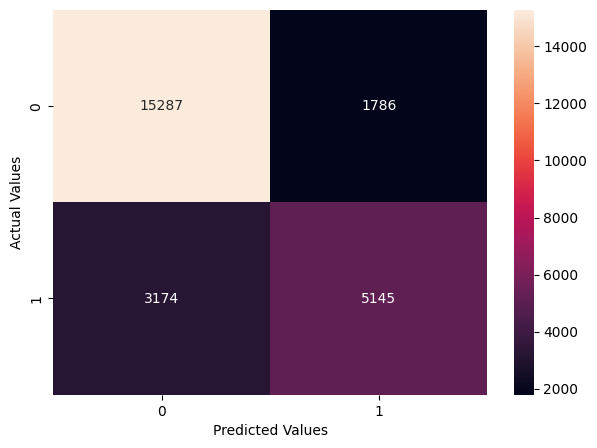

In [ ]:
cm = confusion_matrix(y_train, pred_train1)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80466 0.61846    0.74232 0.67475

#### ROC-AUC

- ROC-AUC on training set

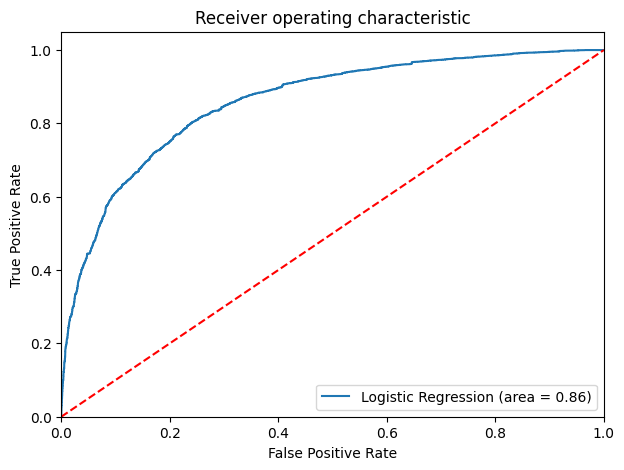

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.30742029727344694


In [ ]:
optimal_threshold_curve = 0.30742

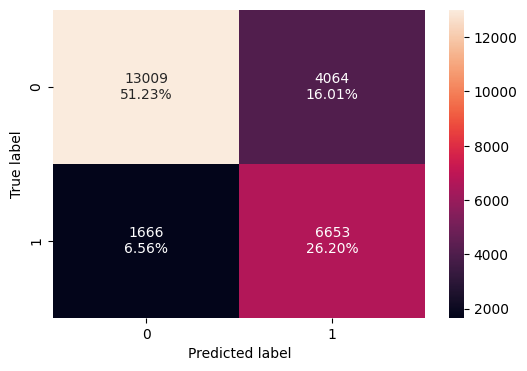

In [ ]:
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.77430 0.79962    0.62075 0.69892

- Recall has improved as compared to the initial model.
- Model is giving a better performance with 0.30742 threshold found using AUC-ROC curve.

#### Using Precision-Recall curve to see if we can find a better threshold

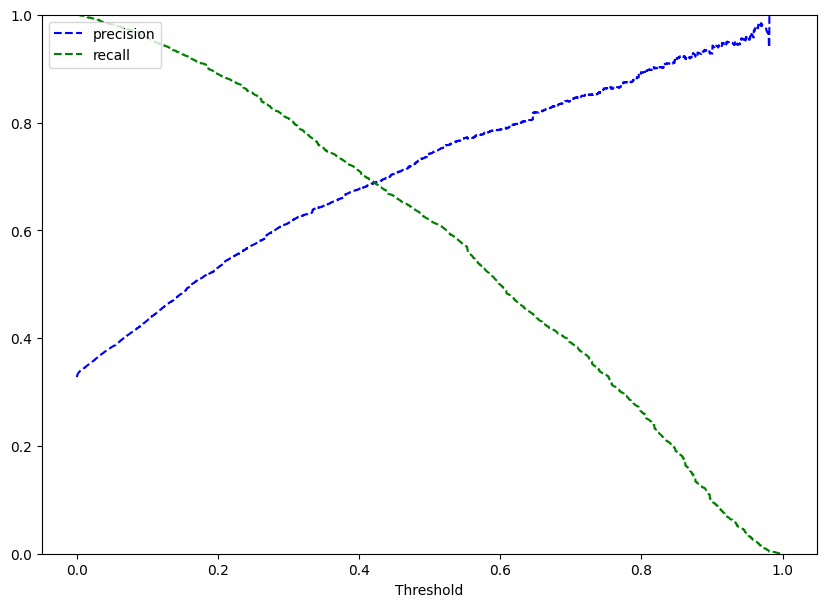

In [ ]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

- At threshold around 0.42 we will get equal precision and recall but will use the optimal of 0.3074 to check the recall and precision values.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

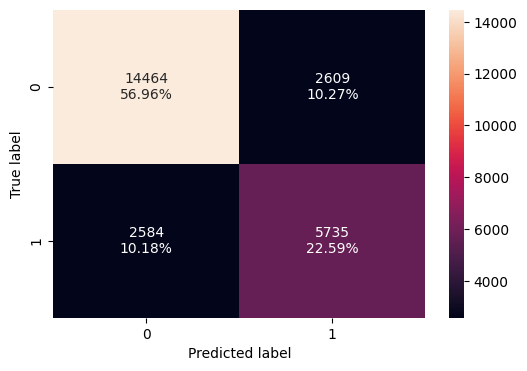

In [ ]:
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.79549 0.68939    0.68732 0.68835

## Final Model Summary

In [ ]:

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.30742 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression statsmodel  \
Accuracy                          0.80466   
Recall                            0.61846   
Precision                         0.74232   
F1                                0.67475   

           Logistic Regression-0.30742 Threshold  \
Accuracy                                 0.77430   
Recall                                   0.79962   
Precision                                0.62075   
F1                                       0.69892   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.79549  
Recall                                0.68939  
Precision                             0.68732  
F1                                    0.68835

In [ ]:
X_test1 = X_test[X_train1.columns].astype(float)

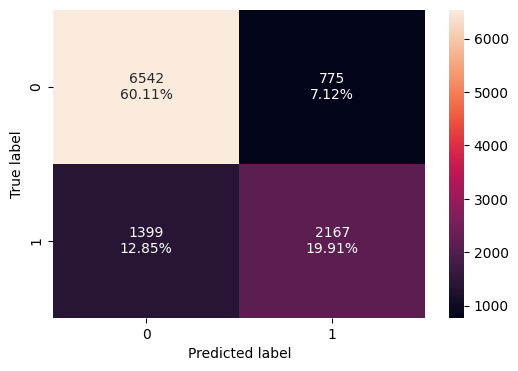

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80024 0.60768    0.73657 0.66595

- ROC curve on test set

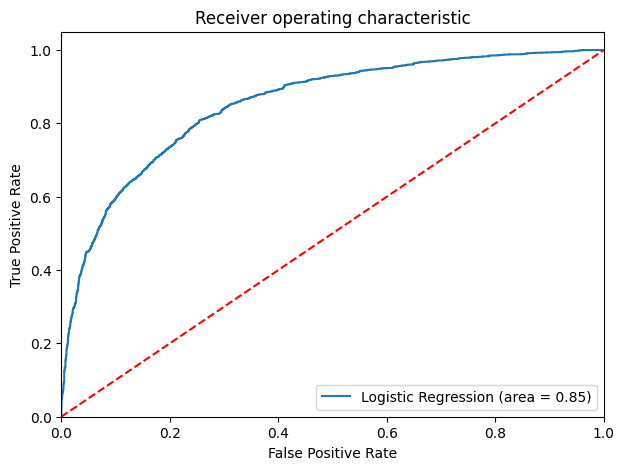

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- optimal_threshold_curve = 0.30742

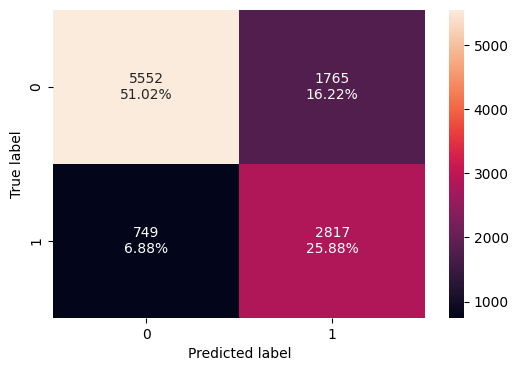

In [ ]:
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.76900 0.78996    0.61480 0.69146

- optimal_threshold_curve = 0.42

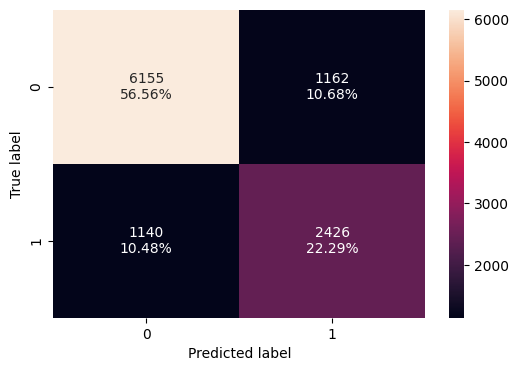

In [ ]:
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.78848 0.68031    0.67614 0.67822

In [ ]:

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.30742 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression statsmodel  \
Accuracy                          0.80024   
Recall                            0.60768   
Precision                         0.73657   
F1                                0.66595   

           Logistic Regression-0.30742 Threshold  \
Accuracy                                 0.76900   
Recall                                   0.78996   
Precision                                0.61480   
F1                                       0.69146   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.78848  
Recall                                0.68031  
Precision                             0.67614  
F1                                    0.67822

In [ ]:

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.30742 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression statsmodel  \
Accuracy                          0.80466   
Recall                            0.61846   
Precision                         0.74232   
F1                                0.67475   

           Logistic Regression-0.30742 Threshold  \
Accuracy                                 0.77430   
Recall                                   0.79962   
Precision                                0.62075   
F1                                       0.69892   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.79549  
Recall                                0.68939  
Precision                             0.68732  
F1                                    0.68835

- All the models are giving a generalized performance on training and test set.
- The highest recall is 7996% on the training set.
- Using the model with default threshold the model gave a low recall but good precision scores - This model will help INN Hotel make more revenue but over strech thir resources.
- Using the model with 0.30742 threshold the model will give a high recall but low precision scores - This model will help INN Hotel to plan for extra resources and be prepared to accommodate extra guests.
- Using the model with 0.42 threshold the model gives a balance recall and precision score - This model will help INN Hotel to maintain a balance in identifying potential guests and the cost of resources.

- From our logistic regression model we identified that Market Segment type is a significant predictor of a booking being cancelled .
- INN Hotel needs to design some incentive packages for repeated guests, since they literaly do not camcel their bookings
- We also noticed that the guests with more special request tend not to cancel their bookings

## Building a Decision Tree model

In [ ]:
X = innh.drop(['booking_status'], axis=1)
y = innh['booking_status']



# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (21765, 17)
Shape of test set :  (14510, 17)
Percentage of classes in training set:
0   0.66855
1   0.33145
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67808
1   0.32192
Name: booking_status, dtype: float64


- I will build the model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

In [ ]:
dTree = DecisionTreeClassifier(criterion ='gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  0.9940271077417873
Accuracy on test set :  0.8678842177808408


In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Checking model performance on training set

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    dTree, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99403 0.98655    0.99538 0.99095

### Confusion Matrix

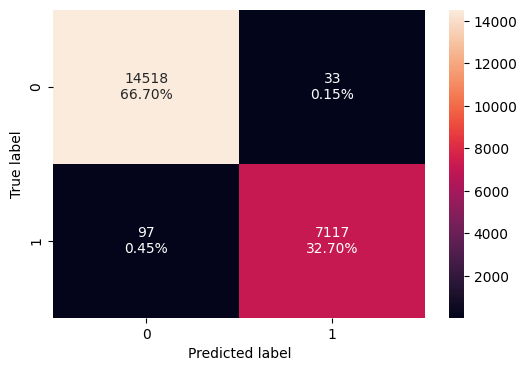

In [ ]:
confusion_matrix_sklearn(dTree, X_train,y_train)

### Checking model performance on test set

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    dTree, X_test, y_test
)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.86788 0.79747    0.79323 0.79535

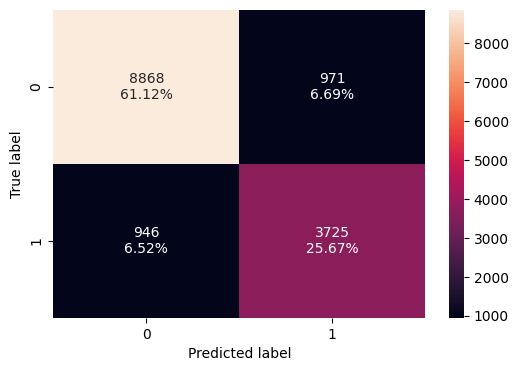

In [ ]:
confusion_matrix_sklearn(dTree, X_test, y_test)

### Visualizing the Decision Tree

In [ ]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


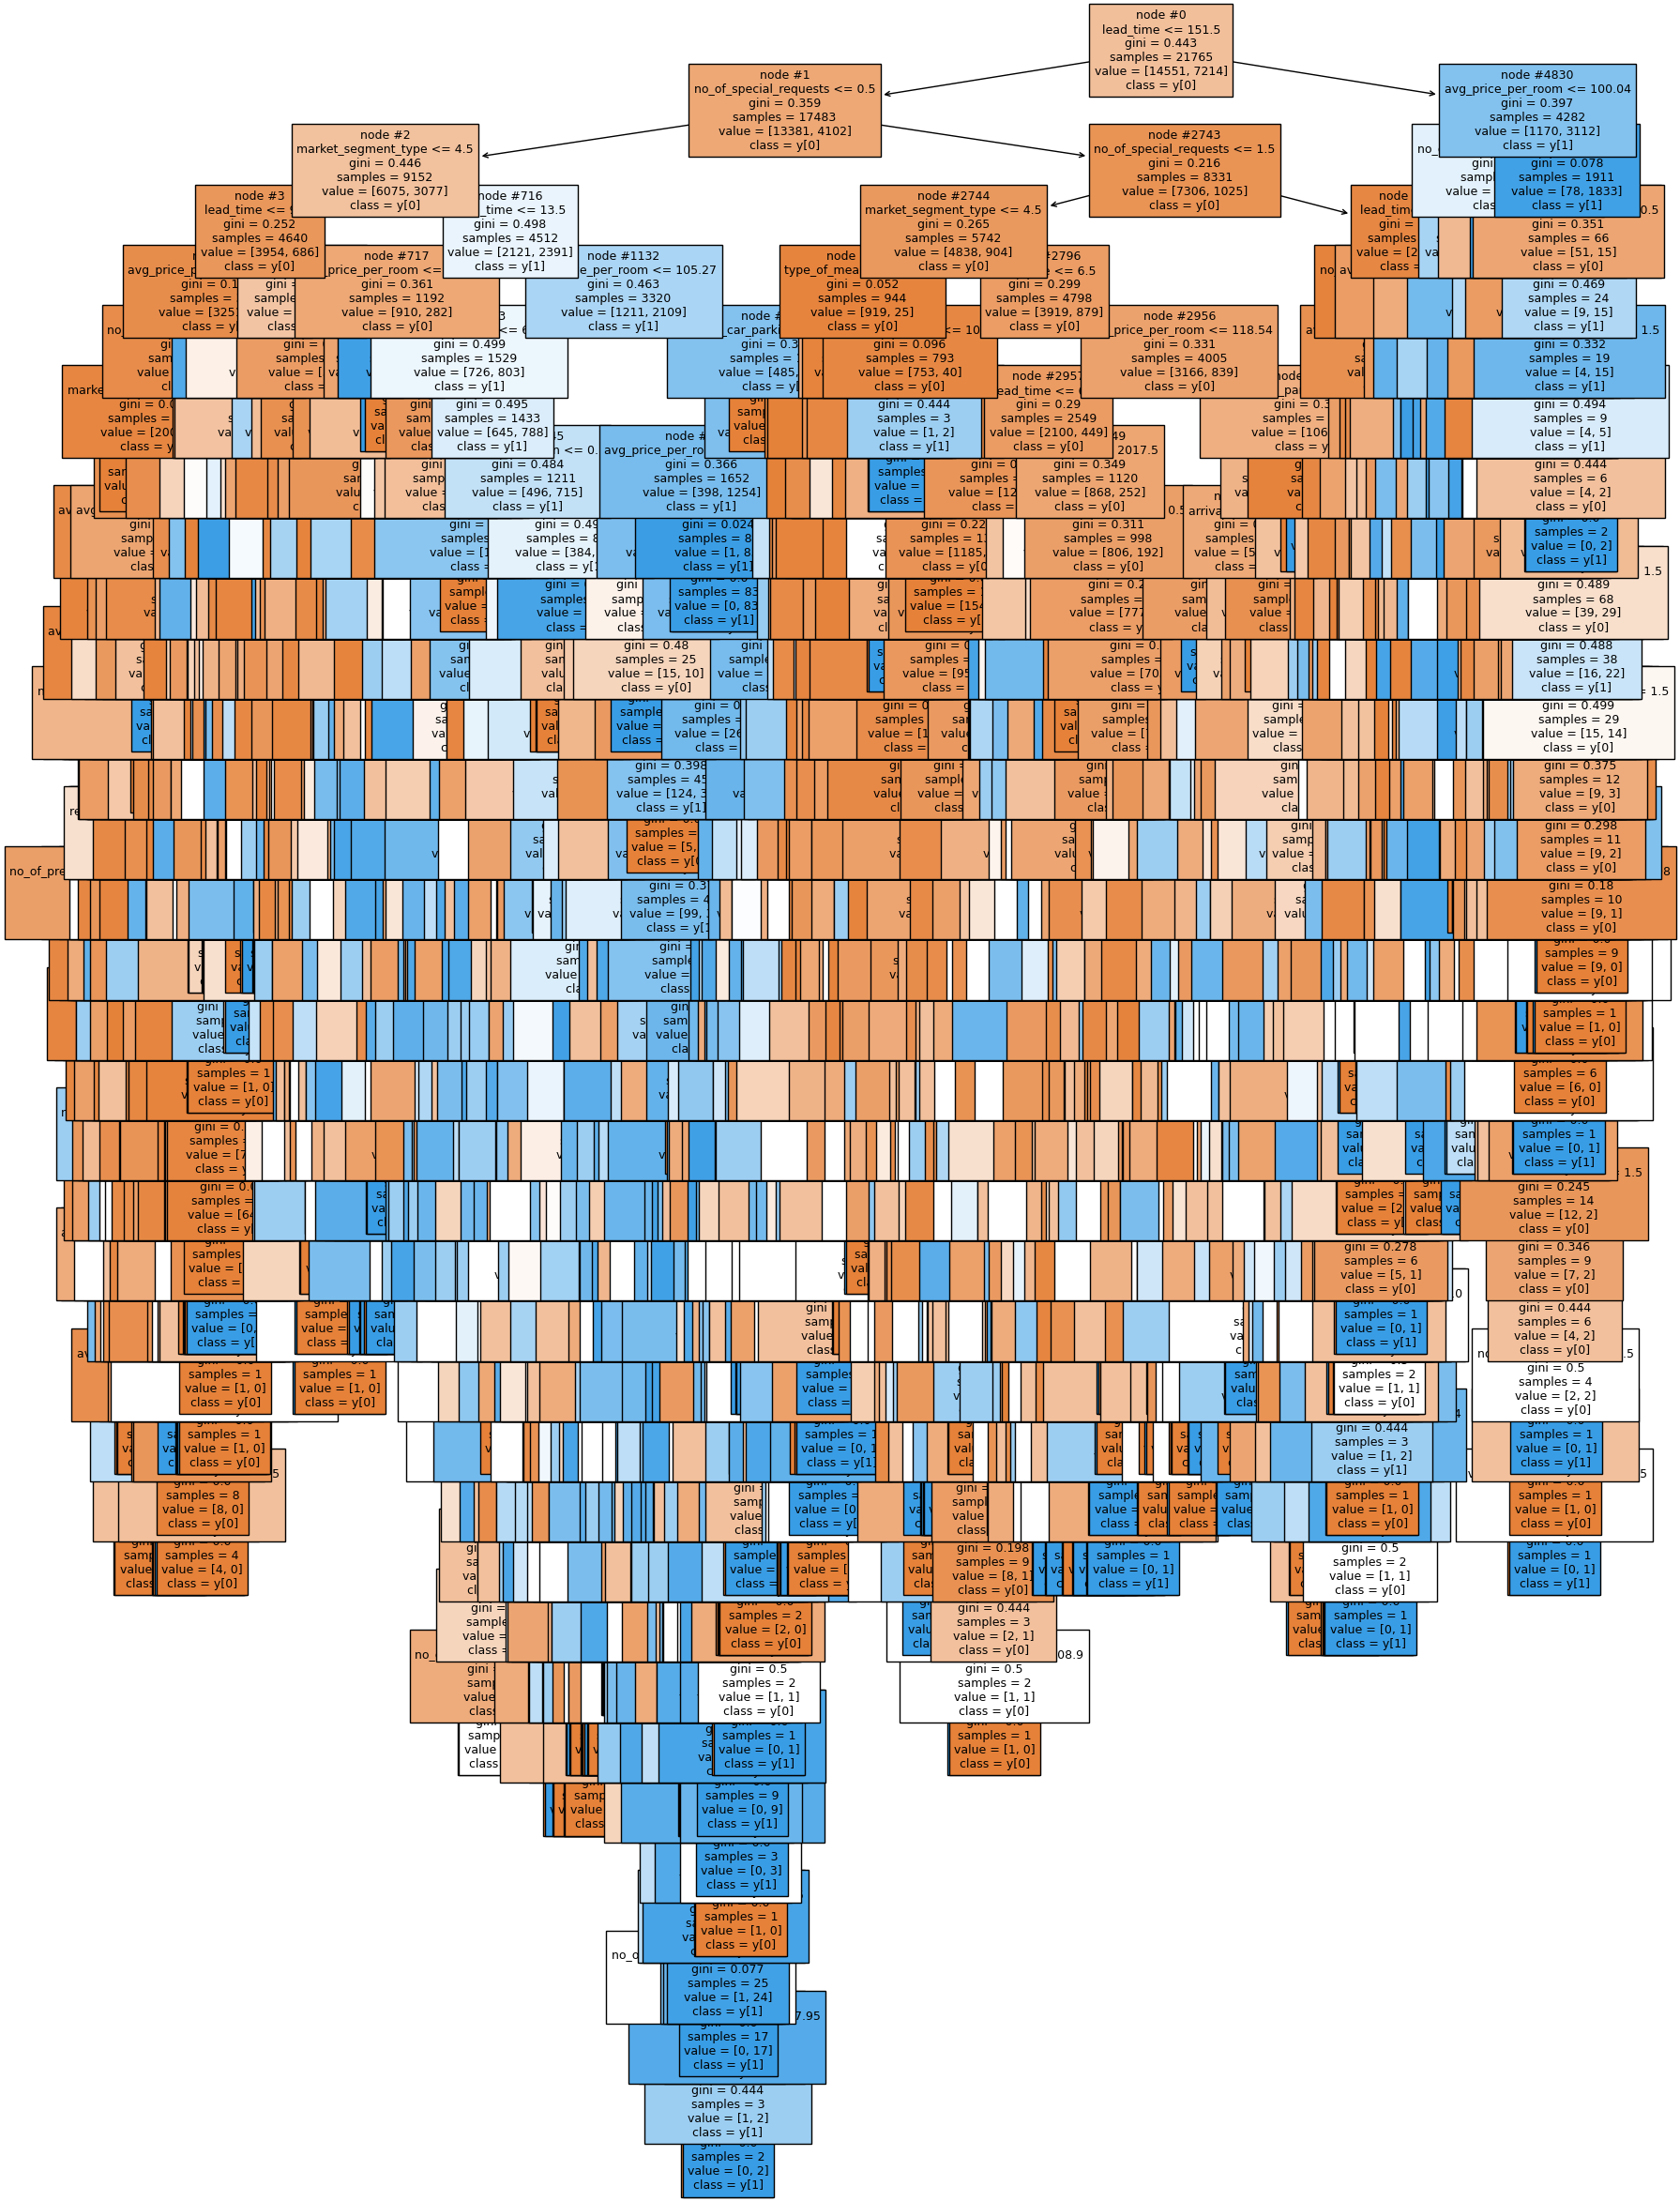

In [ ]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 4.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type <= 3.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 48.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [54.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  48.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [89.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   | 

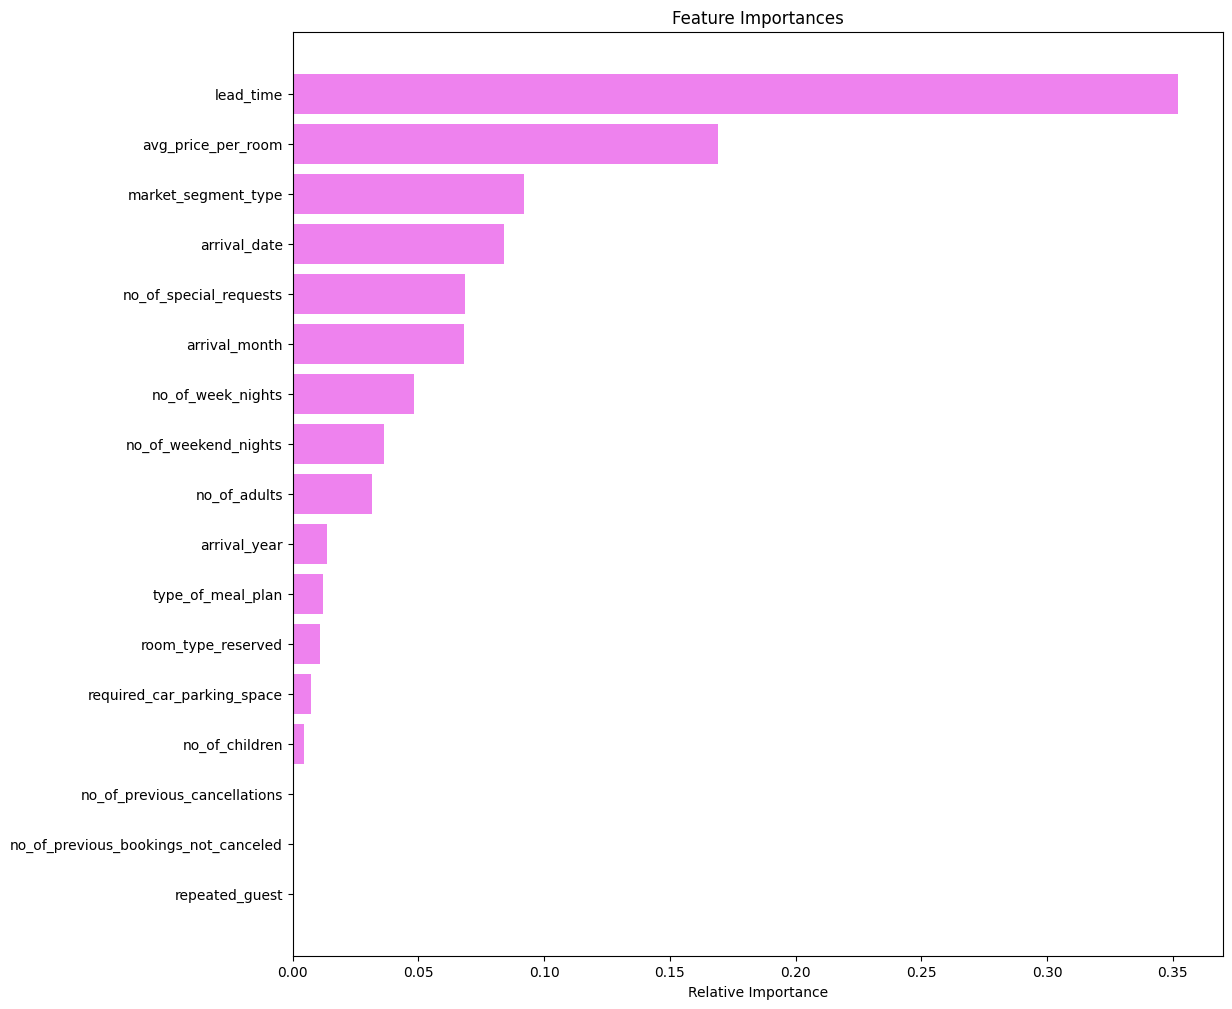

In [ ]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Lead time, avg price per room, market segment typ, arrival date, no of special requests and arrival month are the top 6 important features.

## Do we need to prune the tree?

#### Using GridSearch for Hyperparameter tuning of our tree model

- Improve our model performance .

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=1e-06, random_state=1)

### Checking performance on training set

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.99403 0.98655    0.99538 0.99095

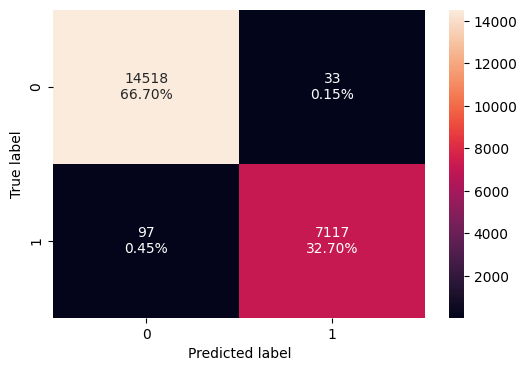

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

### Checking model performance on test set

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.86899 0.79854    0.79531 0.79692

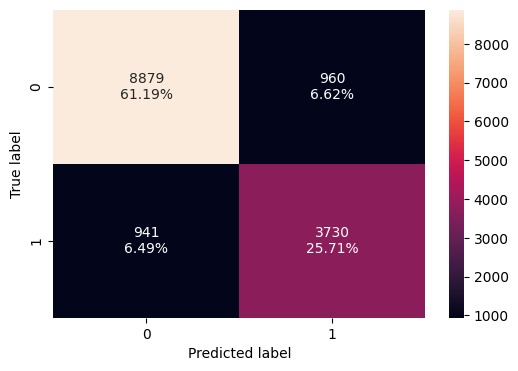

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

* After hyperparameter tuning the model performance has remained same and the model has become simpler.

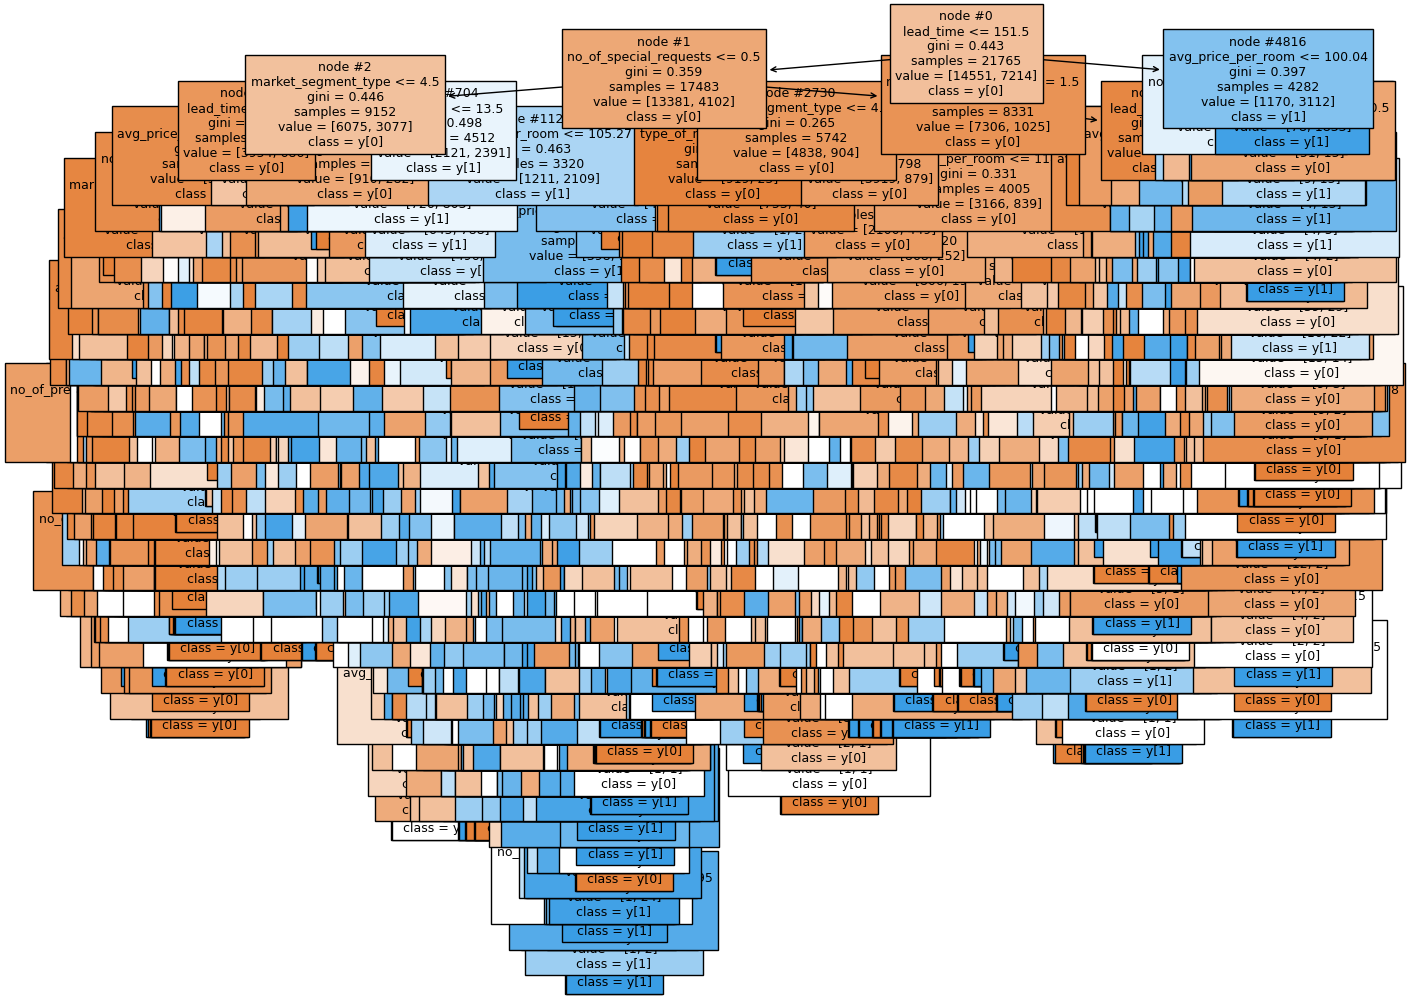

In [ ]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

### Cost Complexity Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00755
1        0.00000     0.00755
2        0.00000     0.00755
3        0.00000     0.00755
4        0.00000     0.00756
...          ...         ...
1203     0.00646     0.28779
1204     0.01281     0.30060
1205     0.01713     0.31773
1206     0.02445     0.36663
1207     0.07655     0.44318

[1208 rows x 2 columns]

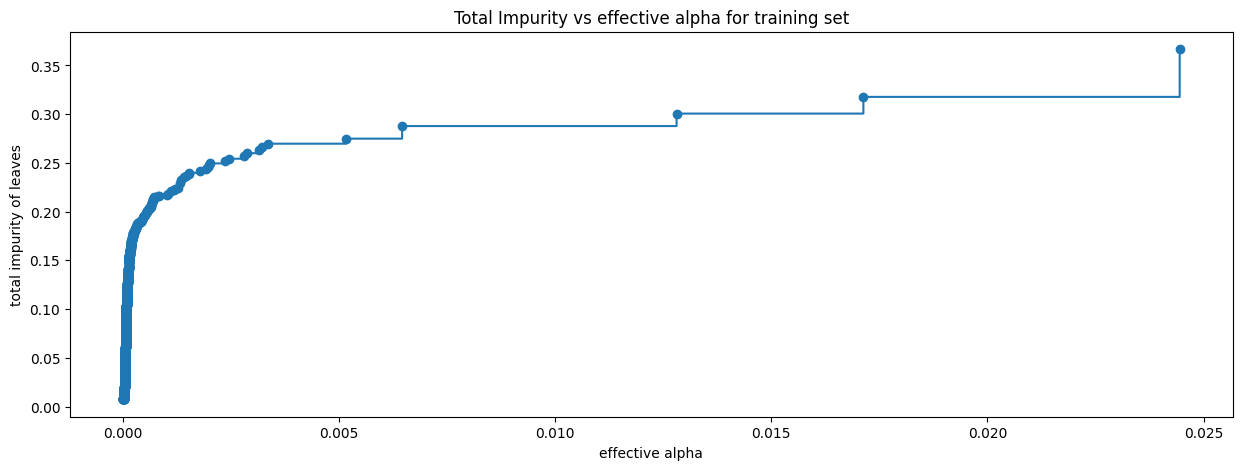

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07654983444812308


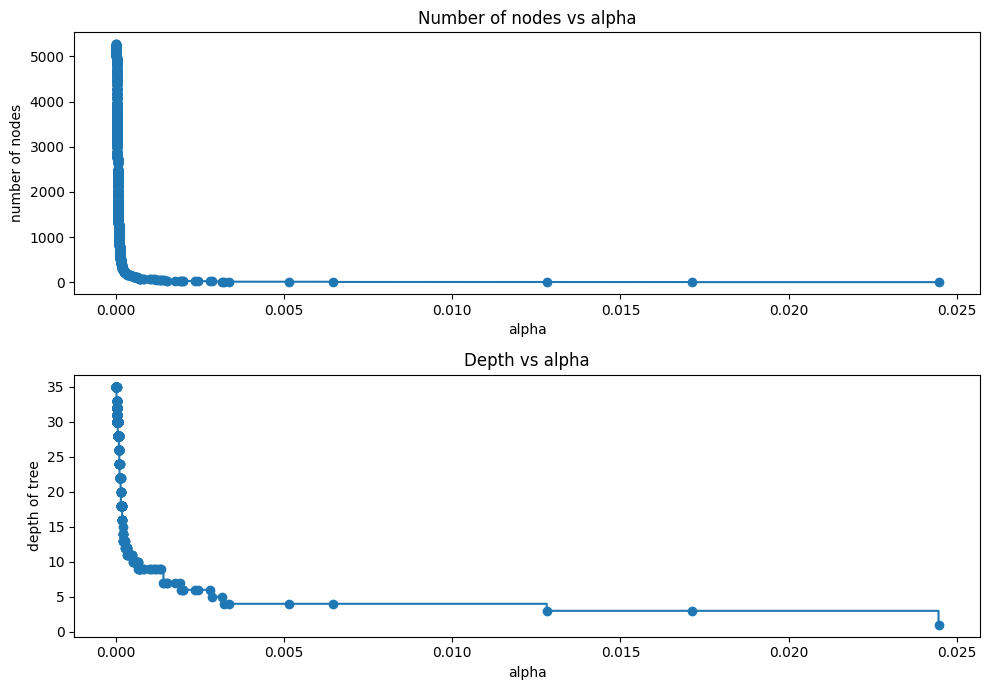

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs alpha for training and testing sets

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

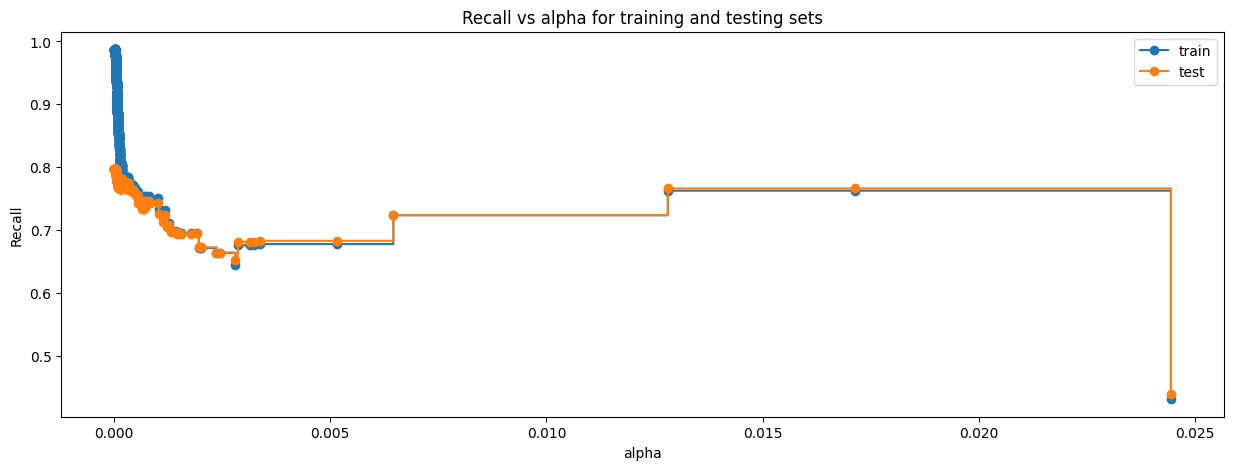

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=2.2972662531587402e-05, random_state=1)


### Checking model performance on training set

In [ ]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy  Recall  Precision      F1
0   0.99384 0.98739    0.99400 0.99068

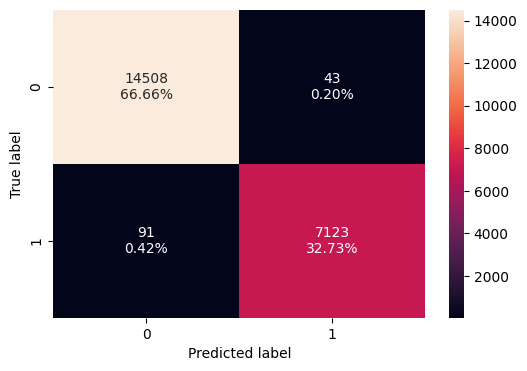

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

### Checking model performance on test set

In [ ]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy  Recall  Precision      F1
0   0.86782 0.79790    0.79281 0.79535

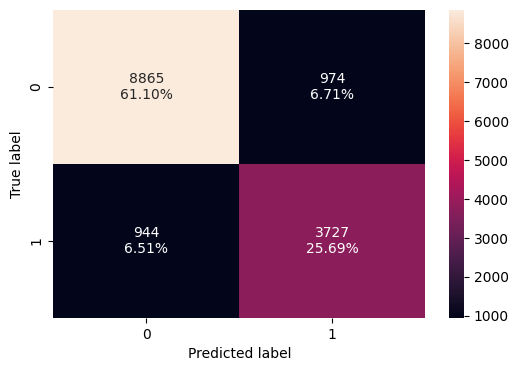

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

### Visualizing the Decision Tree

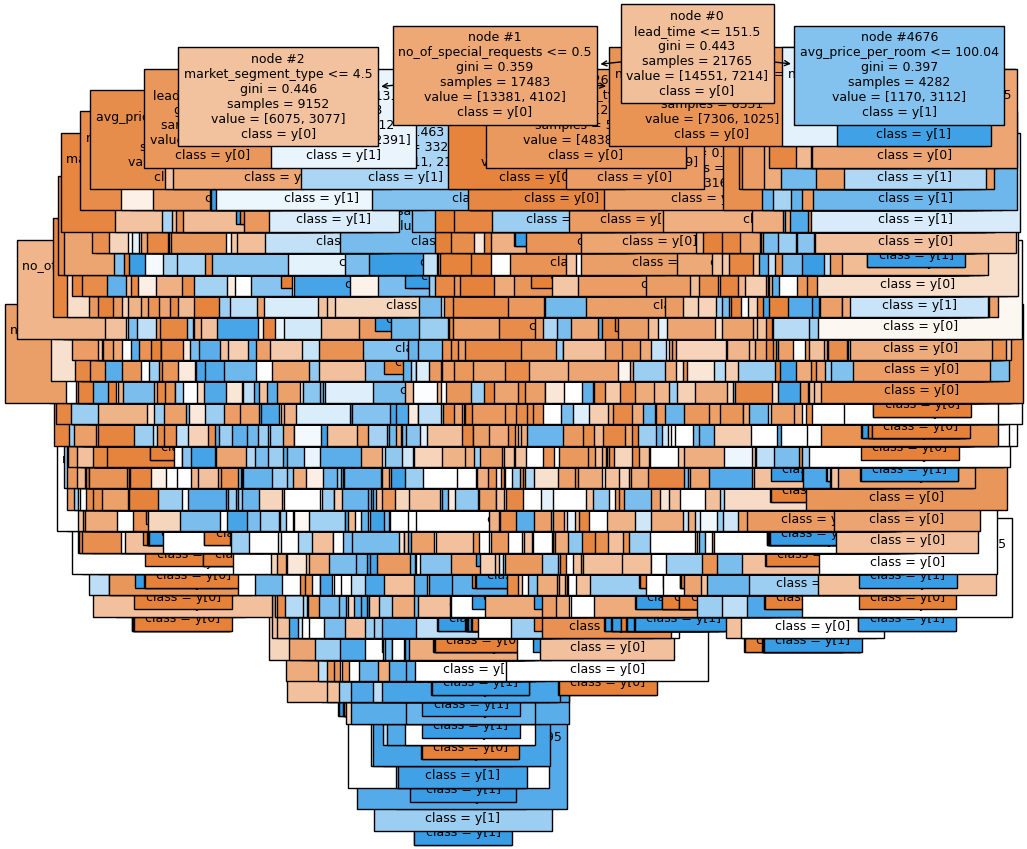

In [ ]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [ ]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 4.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type <= 3.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 48.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [54.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  48.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [89.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   | 

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                         Imp
lead_time                            0.35272
avg_price_per_room                   0.16927
market_segment_type                  0.09213
arrival_date                         0.08355
no_of_special_requests               0.06866
arrival_month                        0.06794
no_of_week_nights                    0.04838
no_of_weekend_nights                 0.03640
no_of_adults                         0.03180
arrival_year                         0.01363
type_of_meal_plan                    0.01180
room_type_reserved                   0.01104
required_car_parking_space           0.00738
no_of_children                       0.00460
no_of_previous_cancellations         0.00025
no_of_previous_bookings_not_canceled 0.00024
repeated_guest                       0.00022


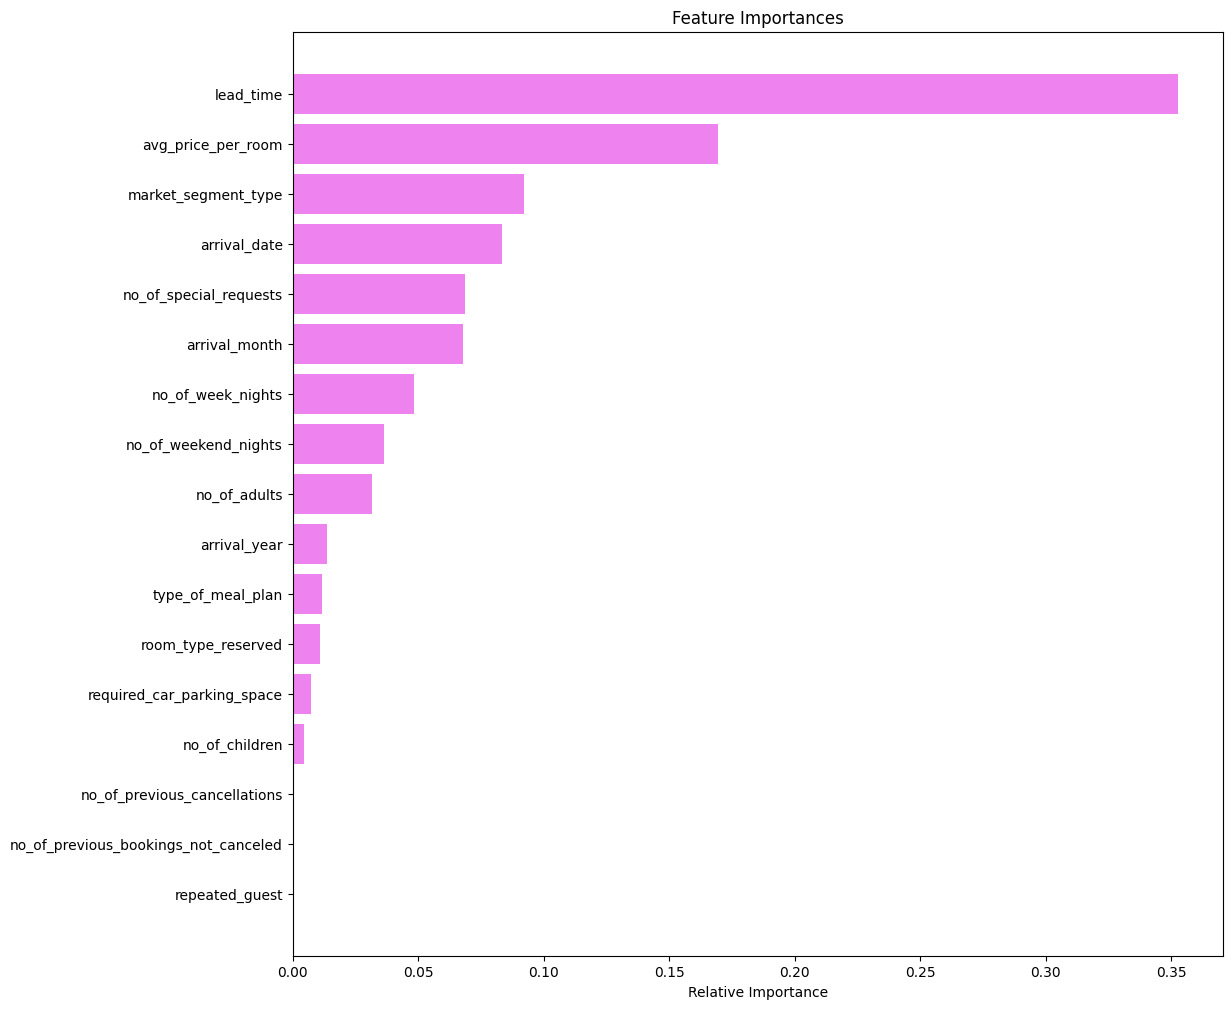

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99403                      0.99403   
Recall                   0.98655                      0.98655   
Precision                0.99538                      0.99538   
F1                       0.99095                      0.99095   

           Decision Tree (Post-Pruning)  
Accuracy                        0.99384  
Recall                          0.98739  
Precision                       0.99400  
F1                              0.99068

In [ ]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.86788                      0.86899   
Recall                   0.79747                      0.79854   
Precision                0.79323                      0.79531   
F1                       0.79535                      0.79692   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86782  
Recall                          0.79790  
Precision                       0.79281  
F1                              0.79535

## Actionable Insights and Recommendations

  - INN Hotel must discourage camcellation of bookings by providing some form of reward to repeated guests and some for non-refundable for bookings

  - The Staffs must highlight to guest who might not request for special service, the various special services available,this is becouse guest that requested for more special services did not cancel their bookings.

  - Particular attention must be paid tp the Market segment type
  